In [2]:
##Import Libraries
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn import metrics

from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
from sklearn.linear_model import LogisticRegression 


from sklearn.preprocessing import StandardScaler, label_binarize, OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.metrics import accuracy_score, classification_report,confusion_matrix, roc_curve, auc
from sklearn.multiclass import OneVsRestClassifier, OneVsOneClassifier
from sklearn.model_selection import GridSearchCV, RandomizedSearchCV

import warnings
warnings.filterwarnings("ignore")

In [3]:
# load the data
data=pd.read_csv(r"C:\Users\DD\Desktop\ML PROJECTS\Classification\data.csv")

In [4]:
#read the data 
data

,Bankrupt,ROA(C) before interest and depreciation before interest,ROA(A) before interest and % after tax,ROA(B) before interest and depreciation after tax,Operating Gross Margin,Realized Sales Gross Margin,Operating Profit Rate,Pre-tax net Interest Rate,After-tax net Interest Rate,Non-industry income and expenditure/revenue,...,Net Income to Total Assets,Total assets to GNP price,No-credit Interval,Gross Profit to Sales,Net Income to Stockholder's Equity,Liability to Equity,Degree of Financial Leverage (DFL),Interest Coverage Ratio (Interest expense to EBIT),Net Income Flag,Equity to Liability
0,1,0.370594,0.424389,0.405750,0.601457,0.601457,0.998969,0.796887,0.808809,0.302646,...,0.716845,0.009219,0.622879,0.601453,0.827890,0.290202,0.026601,0.564050,1,0.016469
1,1,0.464291,0.538214,0.516730,0.610235,0.610235,0.998946,0.797380,0.809301,0.303556,...,0.795297,0.008323,0.623652,0.610237,0.839969,0.283846,0.264577,0.570175,1,0.020794
2,1,0.426071,0.499019,0.472295,0.601450,0.601364,0.998857,0.796403,0.808388,0.302035,...,0.774670,0.040003,0.623841,0.601449,0.836774,0.290189,0.026555,0.563706,1,0.016474
3,1,0.399844,0.451265,0.457733,0.583541,0.583541,0.998700,0.796967,0.808966,0.303350,...,0.739555,0.003252,0.622929,0.583538,0.834697,0.281721,0.026697,0.564663,1,0.023982
4,1,0.465022,0.538432,0.522298,0.598783,0.598783,0.998973,0.797366,0.809304,0.303475,...,0.795016,0.003878,0.623521,0.598782,0.839973,0.278514,0.024752,0.575617,1,0.035490
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6814,0,0.493687,0.539468,0.543230,0.604455,0.604462,0.998992,0.797409,0.809331,0.303510,...,0.799927,0.000466,0.623620,0.604455,0.840359,0.279606,0.027064,0.566193,1,0.029890
6815,0,0.475162,0.538269,0.524172,0.598308,0.598308,0.998992,0.797414,0.809327,0.303520,...,0.799748,0.001959,0.623931,0.598306,0.840306,0.278132,0.027009,0.566018,1,0.038284
6816,0,0.472725,0.533744,0.520638,0.610444,0.610213,0.998984,0.797401,0.809317,0.303512,...,0.797778,0.002840,0.624156,0.610441,0.840138,0.275789,0.026791,0.565158,1,0.097649
6817,0,0.506264,0.559911,0.554045,0.607850,0.607850,0.999074,0.797500,0.809399,0.303498,...,0.811808,0.002837,0.623957,0.607846,0.841084,0.277547,0.026822,0.565302,1,0.044009


In [5]:
#top 5 column
data.head()

,Bankrupt,ROA(C) before interest and depreciation before interest,ROA(A) before interest and % after tax,ROA(B) before interest and depreciation after tax,Operating Gross Margin,Realized Sales Gross Margin,Operating Profit Rate,Pre-tax net Interest Rate,After-tax net Interest Rate,Non-industry income and expenditure/revenue,...,Net Income to Total Assets,Total assets to GNP price,No-credit Interval,Gross Profit to Sales,Net Income to Stockholder's Equity,Liability to Equity,Degree of Financial Leverage (DFL),Interest Coverage Ratio (Interest expense to EBIT),Net Income Flag,Equity to Liability
0,1,0.370594,0.424389,0.405750,0.601457,0.601457,0.998969,0.796887,0.808809,0.302646,...,0.716845,0.009219,0.622879,0.601453,0.827890,0.290202,0.026601,0.564050,1,0.016469
1,1,0.464291,0.538214,0.516730,0.610235,0.610235,0.998946,0.797380,0.809301,0.303556,...,0.795297,0.008323,0.623652,0.610237,0.839969,0.283846,0.264577,0.570175,1,0.020794
2,1,0.426071,0.499019,0.472295,0.601450,0.601364,0.998857,0.796403,0.808388,0.302035,...,0.774670,0.040003,0.623841,0.601449,0.836774,0.290189,0.026555,0.563706,1,0.016474
3,1,0.399844,0.451265,0.457733,0.583541,0.583541,0.998700,0.796967,0.808966,0.303350,...,0.739555,0.003252,0.622929,0.583538,0.834697,0.281721,0.026697,0.564663,1,0.023982
4,1,0.465022,0.538432,0.522298,0.598783,0.598783,0.998973,0.797366,0.809304,0.303475,...,0.795016,0.003878,0.623521,0.598782,0.839973,0.278514,0.024752,0.575617,1,0.035490


In [6]:
#last bottom 5
data.tail()

,Bankrupt,ROA(C) before interest and depreciation before interest,ROA(A) before interest and % after tax,ROA(B) before interest and depreciation after tax,Operating Gross Margin,Realized Sales Gross Margin,Operating Profit Rate,Pre-tax net Interest Rate,After-tax net Interest Rate,Non-industry income and expenditure/revenue,...,Net Income to Total Assets,Total assets to GNP price,No-credit Interval,Gross Profit to Sales,Net Income to Stockholder's Equity,Liability to Equity,Degree of Financial Leverage (DFL),Interest Coverage Ratio (Interest expense to EBIT),Net Income Flag,Equity to Liability
6814,0,0.493687,0.539468,0.543230,0.604455,0.604462,0.998992,0.797409,0.809331,0.303510,...,0.799927,0.000466,0.623620,0.604455,0.840359,0.279606,0.027064,0.566193,1,0.029890
6815,0,0.475162,0.538269,0.524172,0.598308,0.598308,0.998992,0.797414,0.809327,0.303520,...,0.799748,0.001959,0.623931,0.598306,0.840306,0.278132,0.027009,0.566018,1,0.038284
6816,0,0.472725,0.533744,0.520638,0.610444,0.610213,0.998984,0.797401,0.809317,0.303512,...,0.797778,0.002840,0.624156,0.610441,0.840138,0.275789,0.026791,0.565158,1,0.097649
6817,0,0.506264,0.559911,0.554045,0.607850,0.607850,0.999074,0.797500,0.809399,0.303498,...,0.811808,0.002837,0.623957,0.607846,0.841084,0.277547,0.026822,0.565302,1,0.044009
6818,0,0.493053,0.570105,0.549548,0.627409,0.627409,0.998080,0.801987,0.813800,0.313415,...,0.815956,0.000707,0.626680,0.627408,0.841019,0.275114,0.026793,0.565167,1,0.233902


In [7]:
#shape of the data i.e no. of rows and columns
data.shape

(6819, 96)

In [8]:
# describe :count,max,min
data.describe(include='all')

,Bankrupt,ROA(C) before interest and depreciation before interest,ROA(A) before interest and % after tax,ROA(B) before interest and depreciation after tax,Operating Gross Margin,Realized Sales Gross Margin,Operating Profit Rate,Pre-tax net Interest Rate,After-tax net Interest Rate,Non-industry income and expenditure/revenue,...,Net Income to Total Assets,Total assets to GNP price,No-credit Interval,Gross Profit to Sales,Net Income to Stockholder's Equity,Liability to Equity,Degree of Financial Leverage (DFL),Interest Coverage Ratio (Interest expense to EBIT),Net Income Flag,Equity to Liability
count,6819.000000,6819.000000,6819.000000,6819.000000,6819.000000,6819.000000,6819.000000,6819.000000,6819.000000,6819.000000,...,6819.000000,6.819000e+03,6819.000000,6754.000000,6806.000000,6819.000000,6819.000000,6819.000000,6819.0,6819.000000
mean,0.032263,0.505180,0.558625,0.553589,0.607948,0.607929,0.998755,0.797190,0.809084,0.303623,...,0.807760,1.862942e+07,0.623915,0.607968,0.840400,0.280365,0.027541,0.565358,1.0,0.047578
std,0.176710,0.060686,0.065620,0.061595,0.016934,0.016916,0.013010,0.012869,0.013601,0.011163,...,0.040332,3.764501e+08,0.012290,0.016955,0.014536,0.014463,0.015668,0.013214,0.0,0.050014
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000e+00,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.0,0.000000
25%,0.000000,0.476527,0.535543,0.527277,0.600445,0.600434,0.998969,0.797386,0.809312,0.303466,...,0.796750,9.036205e-04,0.623636,0.600454,0.840114,0.276944,0.026791,0.565158,1.0,0.024477
50%,0.000000,0.502706,0.559802,0.552278,0.605997,0.605976,0.999022,0.797464,0.809375,0.303525,...,0.810619,2.085213e-03,0.623879,0.605996,0.841177,0.278778,0.026808,0.565252,1.0,0.033798
75%,0.000000,0.535563,0.589157,0.584105,0.613914,0.613842,0.999095,0.797579,0.809469,0.303585,...,0.826455,5.269777e-03,0.624168,0.613924,0.842358,0.281449,0.026913,0.565725,1.0,0.052838
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,9.820000e+09,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.0,1.000000


In [9]:
data.describe()

,Bankrupt,ROA(C) before interest and depreciation before interest,ROA(A) before interest and % after tax,ROA(B) before interest and depreciation after tax,Operating Gross Margin,Realized Sales Gross Margin,Operating Profit Rate,Pre-tax net Interest Rate,After-tax net Interest Rate,Non-industry income and expenditure/revenue,...,Net Income to Total Assets,Total assets to GNP price,No-credit Interval,Gross Profit to Sales,Net Income to Stockholder's Equity,Liability to Equity,Degree of Financial Leverage (DFL),Interest Coverage Ratio (Interest expense to EBIT),Net Income Flag,Equity to Liability
count,6819.000000,6819.000000,6819.000000,6819.000000,6819.000000,6819.000000,6819.000000,6819.000000,6819.000000,6819.000000,...,6819.000000,6.819000e+03,6819.000000,6754.000000,6806.000000,6819.000000,6819.000000,6819.000000,6819.0,6819.000000
mean,0.032263,0.505180,0.558625,0.553589,0.607948,0.607929,0.998755,0.797190,0.809084,0.303623,...,0.807760,1.862942e+07,0.623915,0.607968,0.840400,0.280365,0.027541,0.565358,1.0,0.047578
std,0.176710,0.060686,0.065620,0.061595,0.016934,0.016916,0.013010,0.012869,0.013601,0.011163,...,0.040332,3.764501e+08,0.012290,0.016955,0.014536,0.014463,0.015668,0.013214,0.0,0.050014
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000e+00,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.0,0.000000
25%,0.000000,0.476527,0.535543,0.527277,0.600445,0.600434,0.998969,0.797386,0.809312,0.303466,...,0.796750,9.036205e-04,0.623636,0.600454,0.840114,0.276944,0.026791,0.565158,1.0,0.024477
50%,0.000000,0.502706,0.559802,0.552278,0.605997,0.605976,0.999022,0.797464,0.809375,0.303525,...,0.810619,2.085213e-03,0.623879,0.605996,0.841177,0.278778,0.026808,0.565252,1.0,0.033798
75%,0.000000,0.535563,0.589157,0.584105,0.613914,0.613842,0.999095,0.797579,0.809469,0.303585,...,0.826455,5.269777e-03,0.624168,0.613924,0.842358,0.281449,0.026913,0.565725,1.0,0.052838
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,9.820000e+09,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.0,1.000000


In [10]:
#it provides a concise summary of the DataFrame's structure,
#including the number of non-null values, data types of columns, and memory usage.
#It's a useful method for quickly assessing the basic characteristics of your data

data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6819 entries, 0 to 6818
Data columns (total 96 columns):
 #   Column                                                    Non-Null Count  Dtype  
---  ------                                                    --------------  -----  
 0   Bankrupt                                                  6819 non-null   int64  
 1    ROA(C) before interest and depreciation before interest  6819 non-null   float64
 2    ROA(A) before interest and % after tax                   6819 non-null   float64
 3    ROA(B) before interest and depreciation after tax        6819 non-null   float64
 4    Operating Gross Margin                                   6819 non-null   float64
 5    Realized Sales Gross Margin                              6819 non-null   float64
 6    Operating Profit Rate                                    6819 non-null   float64
 7    Pre-tax net Interest Rate                                6819 non-null   float64
 8    After-tax net Int

In [11]:
#it will display information about that object, including its data type, attributes, and methods, if available
#This information is provided interactively to help you understand the object better.
data.info

<bound method DataFrame.info of       Bankrupt   ROA(C) before interest and depreciation before interest  \
0            1                                           0.370594          
1            1                                           0.464291          
2            1                                           0.426071          
3            1                                           0.399844          
4            1                                           0.465022          
...        ...                                                ...          
6814         0                                           0.493687          
6815         0                                           0.475162          
6816         0                                           0.472725          
6817         0                                           0.506264          
6818         0                                           0.493053          

       ROA(A) before interest and % after tax  \
0     

In [12]:
# number of null values in each column
data.isnull().sum()


Bankrupt                                                    0
 ROA(C) before interest and depreciation before interest    0
 ROA(A) before interest and % after tax                     0
 ROA(B) before interest and depreciation after tax          0
 Operating Gross Margin                                     0
                                                           ..
 Liability to Equity                                        0
 Degree of Financial Leverage (DFL)                         0
 Interest Coverage Ratio (Interest expense to EBIT)         0
 Net Income Flag                                            0
 Equity to Liability                                        0
Length: 96, dtype: int64

<Axes: >

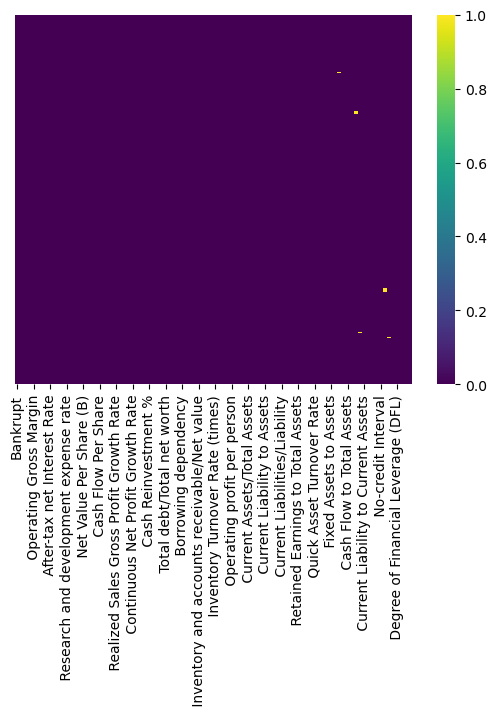

In [13]:
# to illustrate null values using heatmap
sns.heatmap(data.isnull(), yticklabels=False,cmap='viridis')

In [14]:
data[' CFO to Assets'].bfill(axis=0, inplace=True)
data[' Gross Profit to Sales'].bfill(axis=0,inplace=True)

data[' Cash Flow to Equity'].ffill(axis=0,inplace=True)
data[" Net Income to Stockholder's Equity"].bfill(axis=0,inplace=True)

data[' Current Liability to Equity'].fillna(data[' Current Liability to Equity'].mode()[0],inplace=True)

<Axes: >

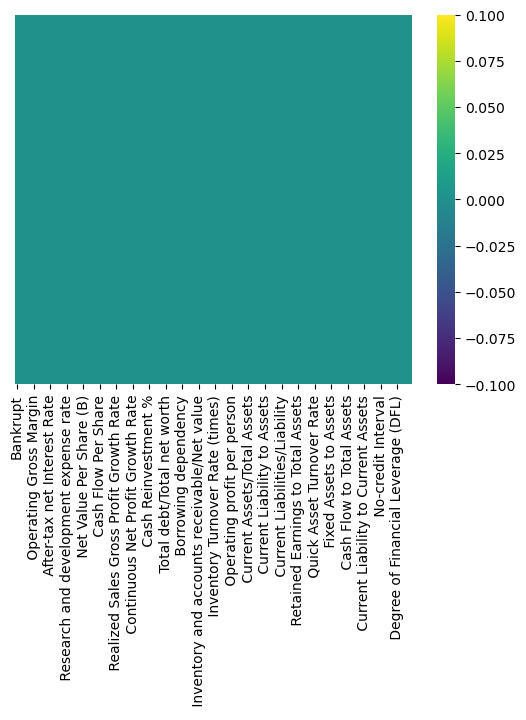

In [15]:
#after filling the missing data 
sns.heatmap(data.isnull(), yticklabels=False,cmap='viridis')

In [16]:
data.dtypes# show data types of data 

Bankrupt                                                      int64
 ROA(C) before interest and depreciation before interest    float64
 ROA(A) before interest and % after tax                     float64
 ROA(B) before interest and depreciation after tax          float64
 Operating Gross Margin                                     float64
                                                             ...   
 Liability to Equity                                        float64
 Degree of Financial Leverage (DFL)                         float64
 Interest Coverage Ratio (Interest expense to EBIT)         float64
 Net Income Flag                                              int64
 Equity to Liability                                        float64
Length: 96, dtype: object

In [17]:
cat_data=data.select_dtypes(include="object")#categoriacl data show in data
num_data=data.select_dtypes(exclude="object")#numerical data show in data

In [18]:
cat_data

""
0
1
2
3
4
...
6814
6815
6816
6817


In [19]:
num_data

,Bankrupt,ROA(C) before interest and depreciation before interest,ROA(A) before interest and % after tax,ROA(B) before interest and depreciation after tax,Operating Gross Margin,Realized Sales Gross Margin,Operating Profit Rate,Pre-tax net Interest Rate,After-tax net Interest Rate,Non-industry income and expenditure/revenue,...,Net Income to Total Assets,Total assets to GNP price,No-credit Interval,Gross Profit to Sales,Net Income to Stockholder's Equity,Liability to Equity,Degree of Financial Leverage (DFL),Interest Coverage Ratio (Interest expense to EBIT),Net Income Flag,Equity to Liability
0,1,0.370594,0.424389,0.405750,0.601457,0.601457,0.998969,0.796887,0.808809,0.302646,...,0.716845,0.009219,0.622879,0.601453,0.827890,0.290202,0.026601,0.564050,1,0.016469
1,1,0.464291,0.538214,0.516730,0.610235,0.610235,0.998946,0.797380,0.809301,0.303556,...,0.795297,0.008323,0.623652,0.610237,0.839969,0.283846,0.264577,0.570175,1,0.020794
2,1,0.426071,0.499019,0.472295,0.601450,0.601364,0.998857,0.796403,0.808388,0.302035,...,0.774670,0.040003,0.623841,0.601449,0.836774,0.290189,0.026555,0.563706,1,0.016474
3,1,0.399844,0.451265,0.457733,0.583541,0.583541,0.998700,0.796967,0.808966,0.303350,...,0.739555,0.003252,0.622929,0.583538,0.834697,0.281721,0.026697,0.564663,1,0.023982
4,1,0.465022,0.538432,0.522298,0.598783,0.598783,0.998973,0.797366,0.809304,0.303475,...,0.795016,0.003878,0.623521,0.598782,0.839973,0.278514,0.024752,0.575617,1,0.035490
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6814,0,0.493687,0.539468,0.543230,0.604455,0.604462,0.998992,0.797409,0.809331,0.303510,...,0.799927,0.000466,0.623620,0.604455,0.840359,0.279606,0.027064,0.566193,1,0.029890
6815,0,0.475162,0.538269,0.524172,0.598308,0.598308,0.998992,0.797414,0.809327,0.303520,...,0.799748,0.001959,0.623931,0.598306,0.840306,0.278132,0.027009,0.566018,1,0.038284
6816,0,0.472725,0.533744,0.520638,0.610444,0.610213,0.998984,0.797401,0.809317,0.303512,...,0.797778,0.002840,0.624156,0.610441,0.840138,0.275789,0.026791,0.565158,1,0.097649
6817,0,0.506264,0.559911,0.554045,0.607850,0.607850,0.999074,0.797500,0.809399,0.303498,...,0.811808,0.002837,0.623957,0.607846,0.841084,0.277547,0.026822,0.565302,1,0.044009


In [20]:
rename column 
data.rename(columns = {'Bankrupt?':'Bankrupt'}, inplace = True)

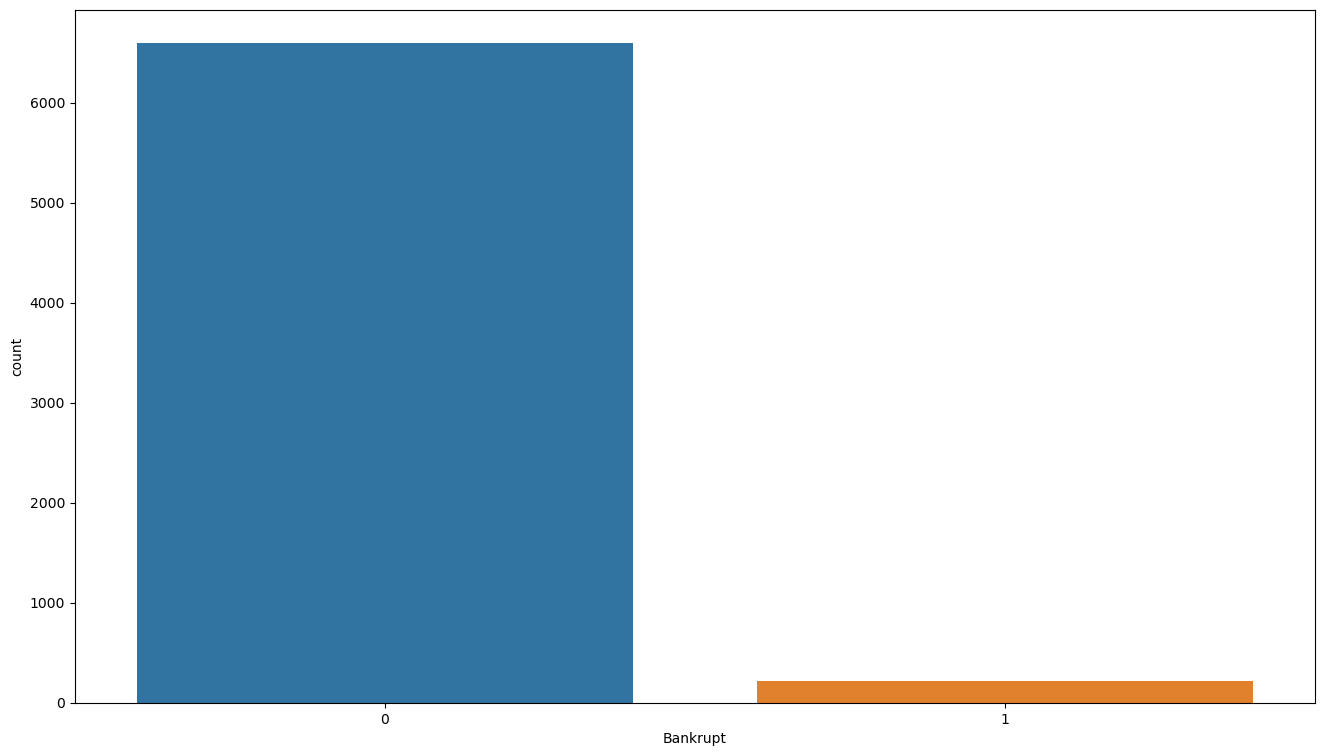

In [21]:
plt.figure(figsize=(16,9))# countplot for bankrupt 
sns.countplot(x = 'Bankrupt', data = data)
plt.show()

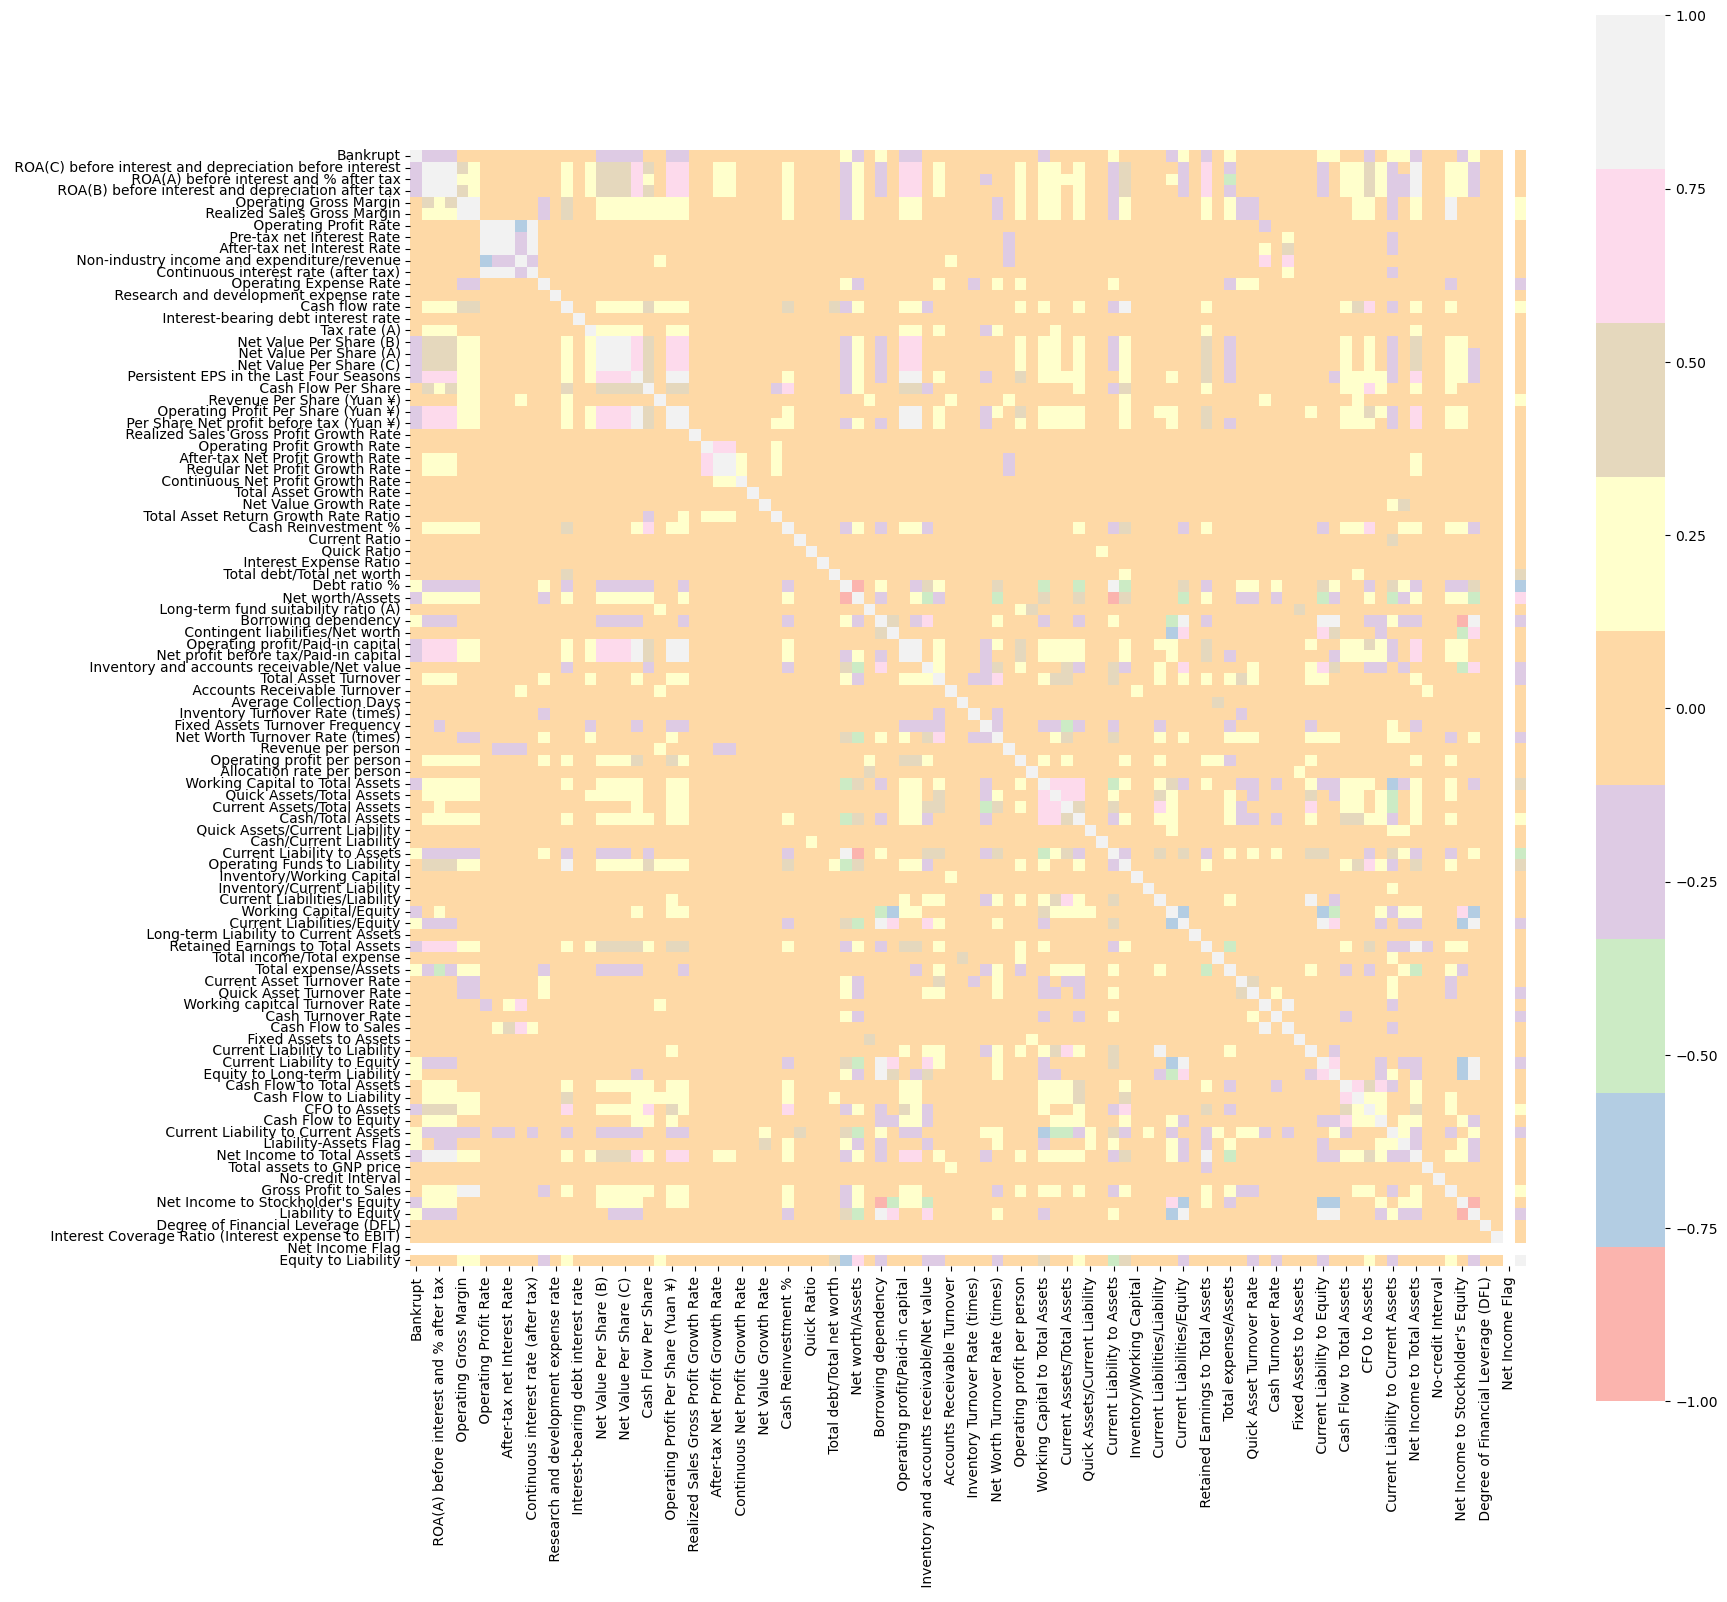

In [22]:
corrmat = data.corr()# subplot for all corelated data
plt.subplots(figsize=(18,18))
sns.heatmap(corrmat,cmap="Pastel1", square=True)
plt.show()

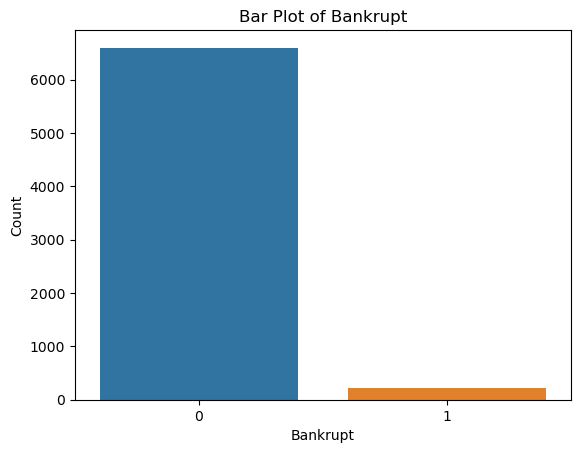

In [23]:
sns.countplot(x='Bankrupt', data=data)#count plot for Bankruptlevel
plt.title('Bar Plot of Bankrupt')
plt.xlabel('Bankrupt')
plt.ylabel('Count')
plt.show()

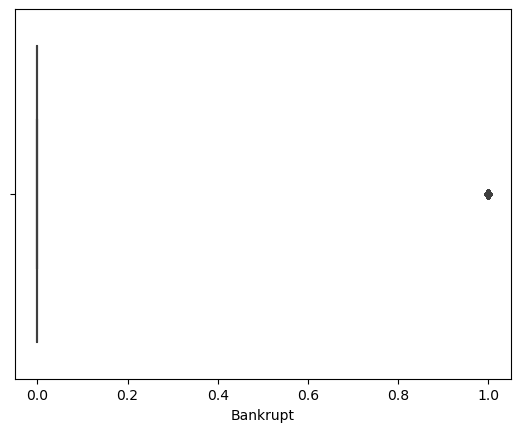

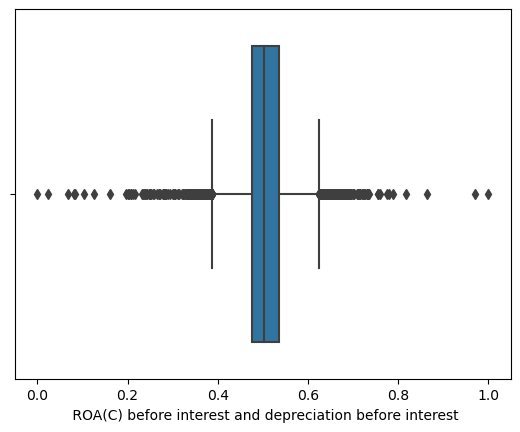

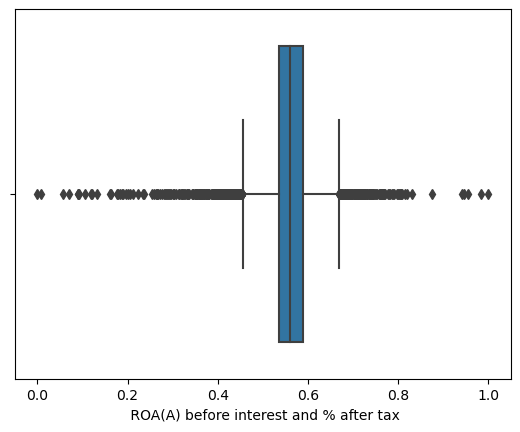

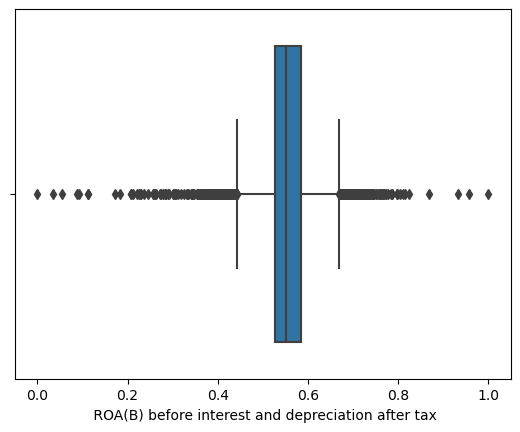

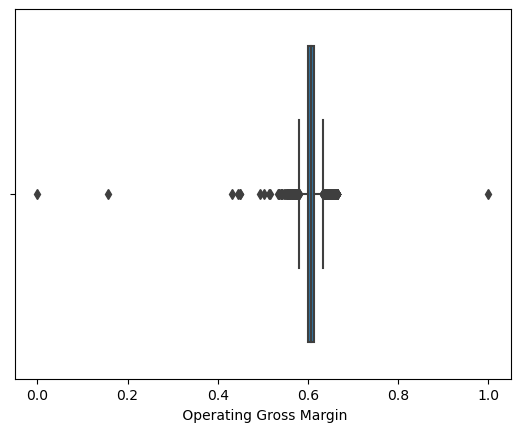

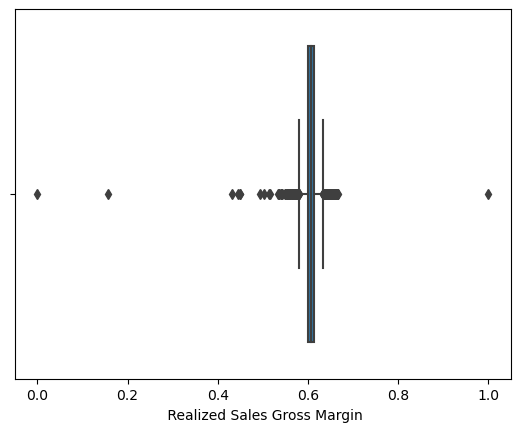

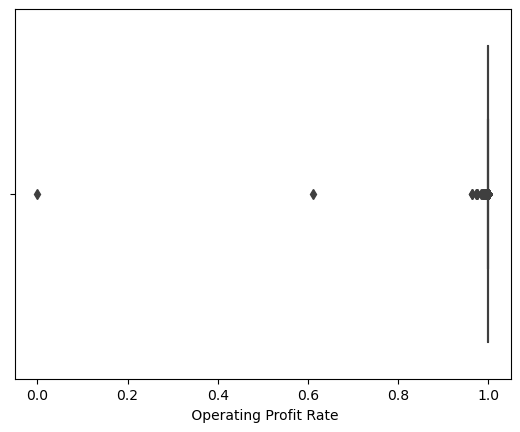

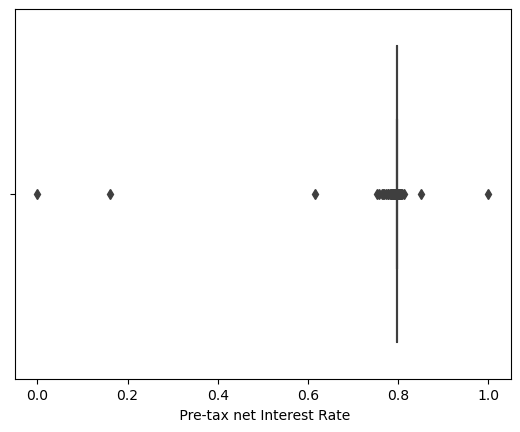

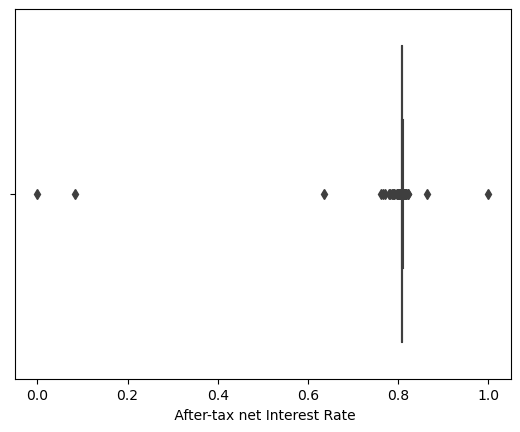

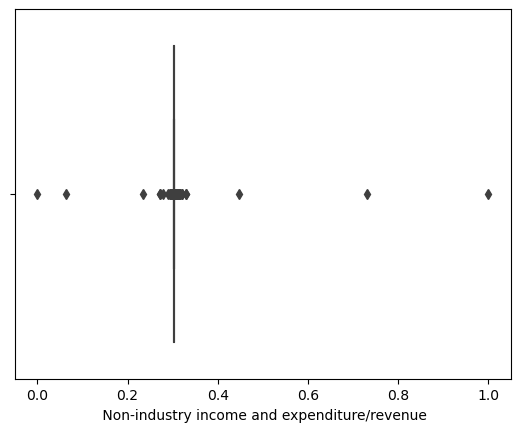

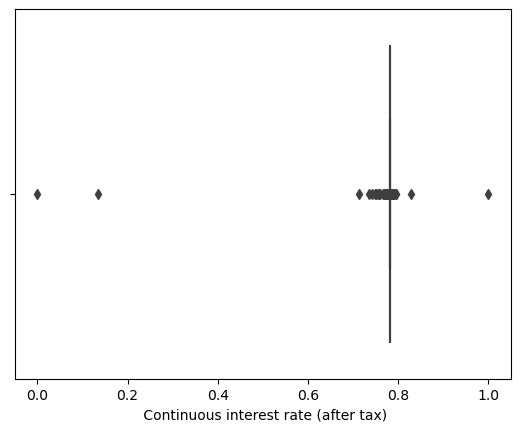

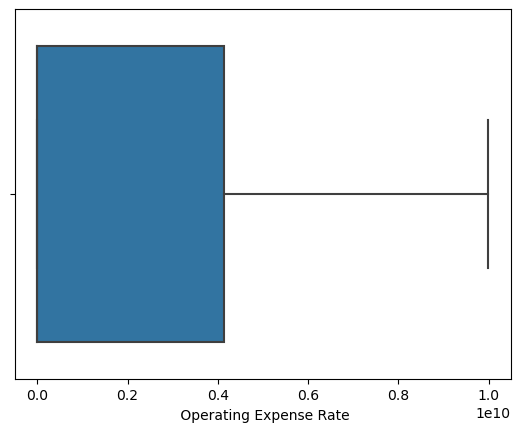

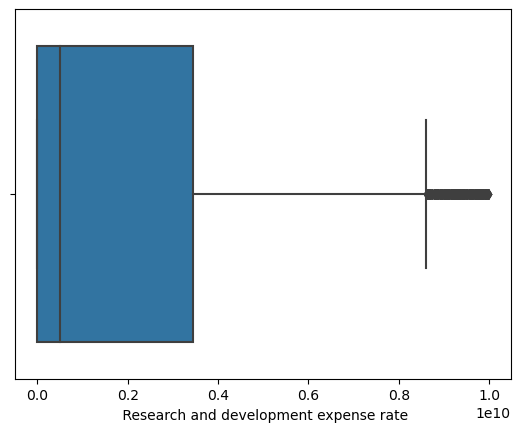

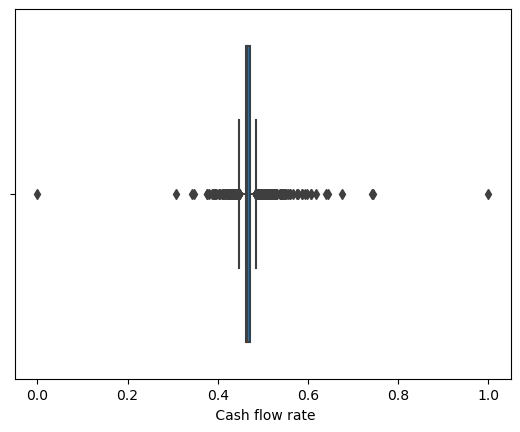

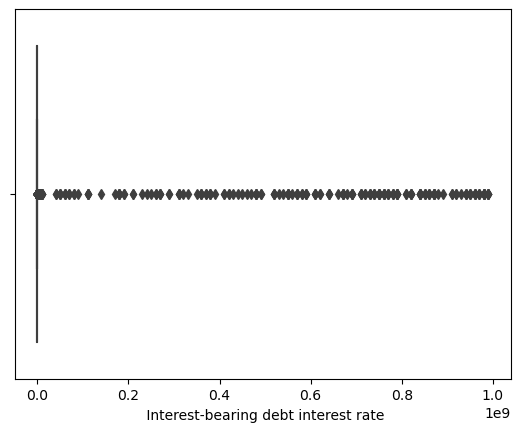

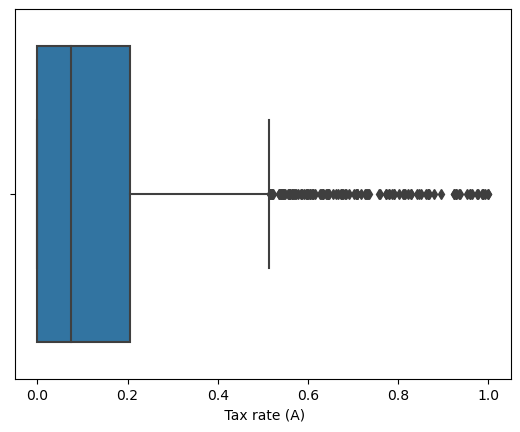

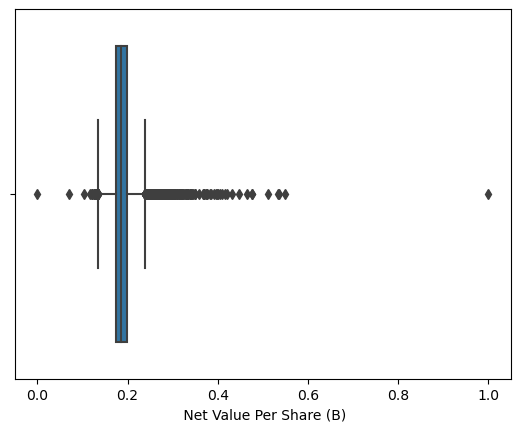

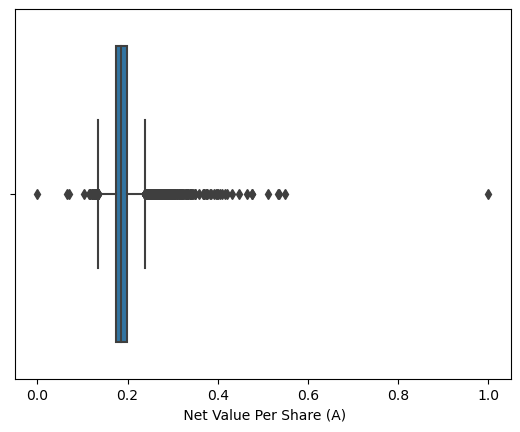

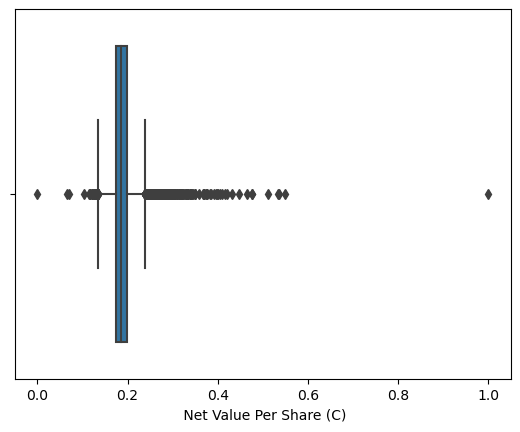

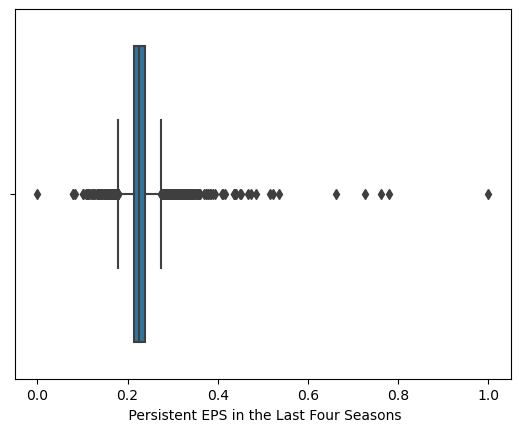

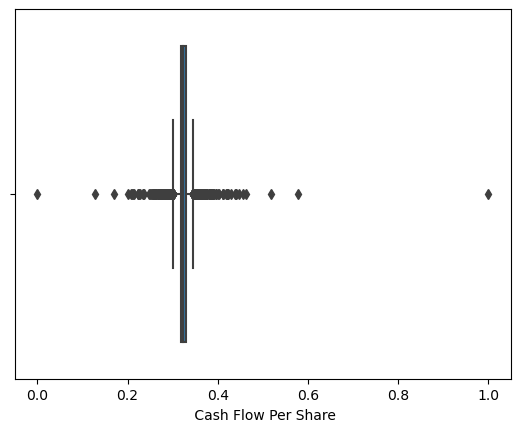

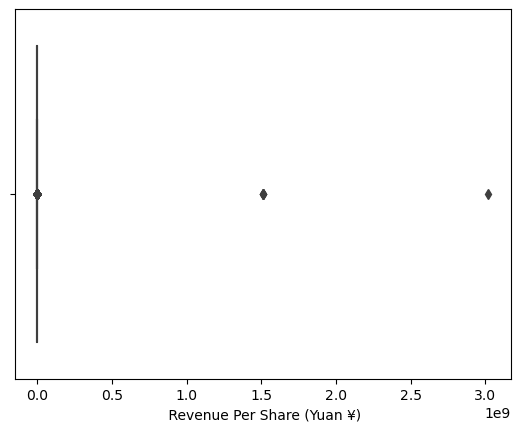

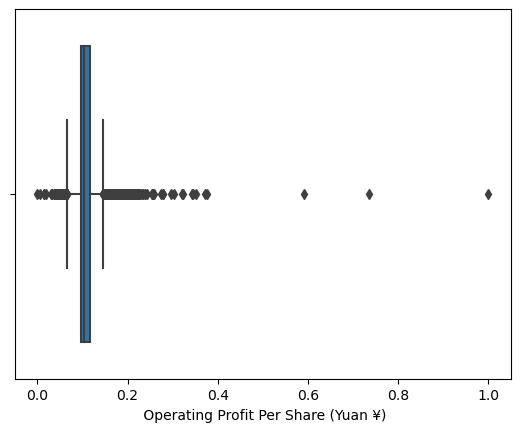

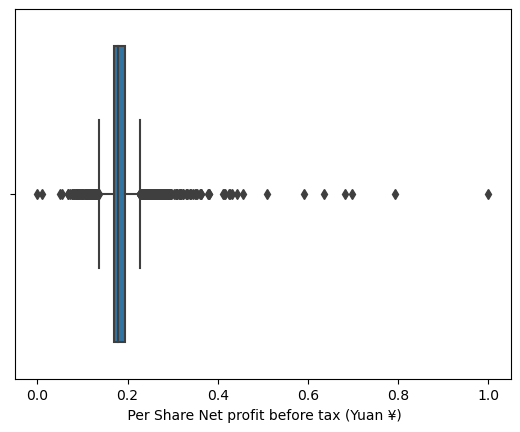

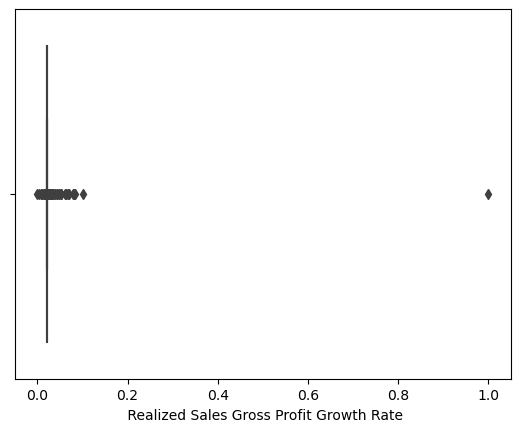

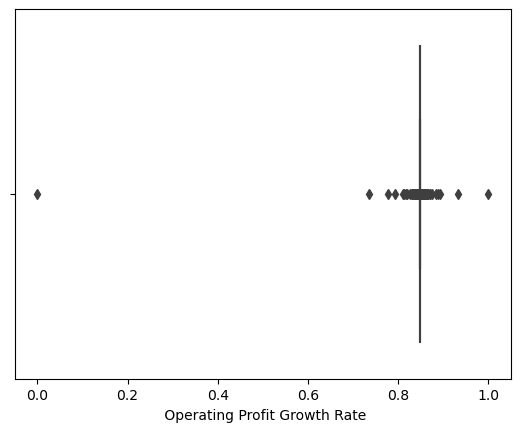

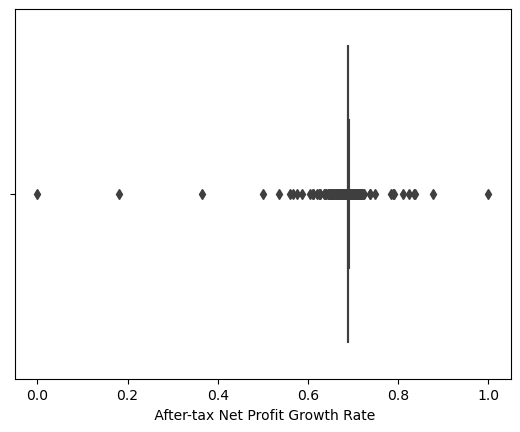

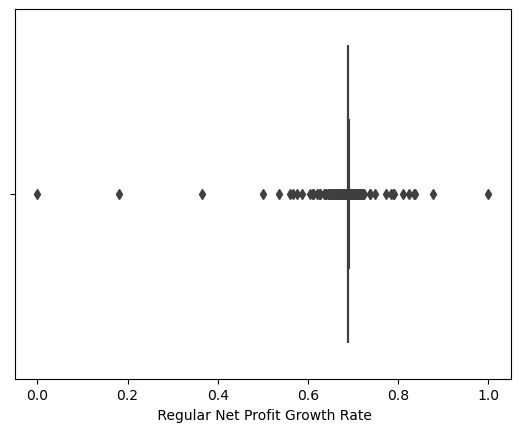

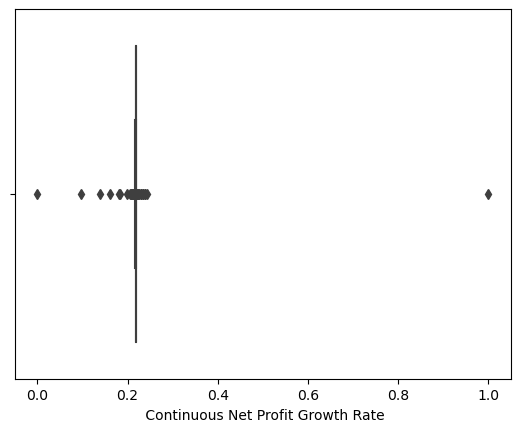

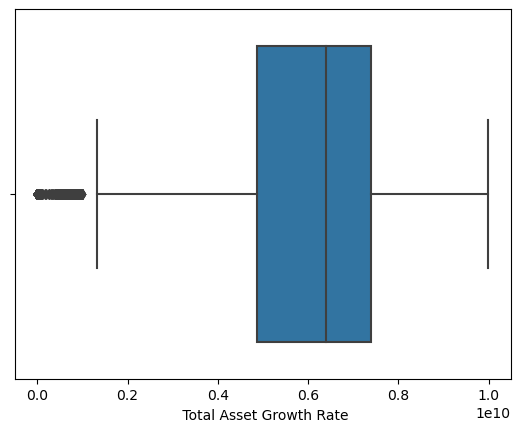

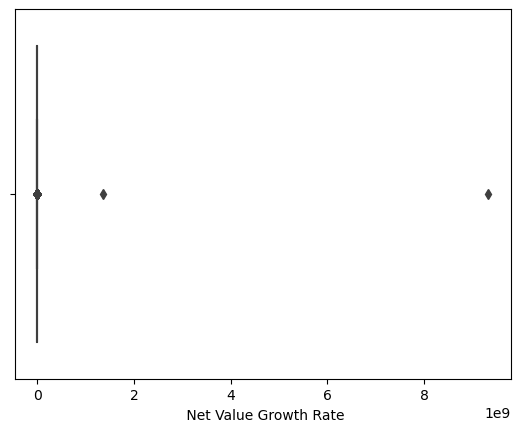

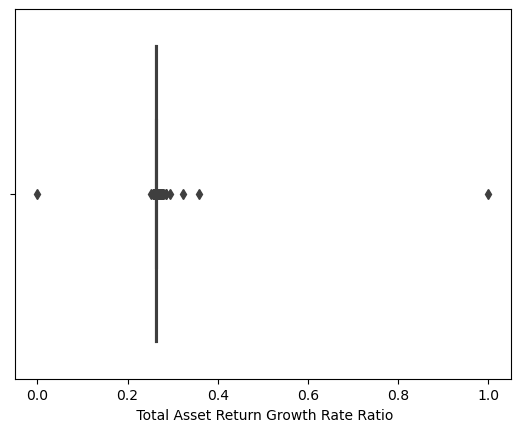

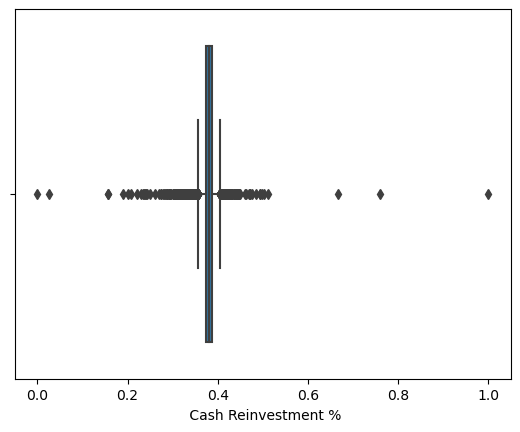

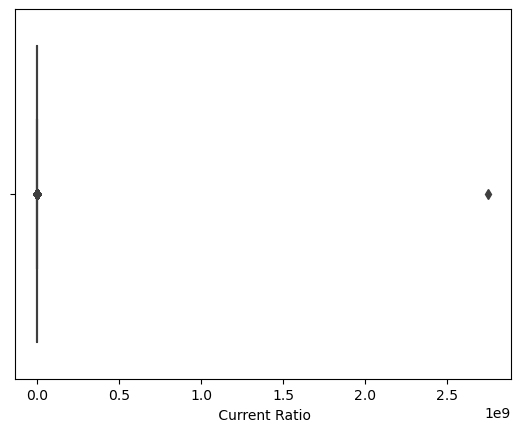

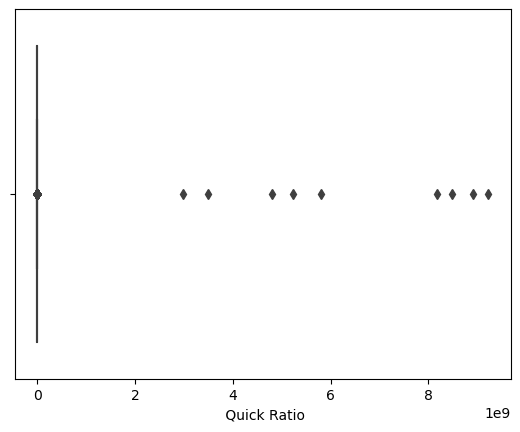

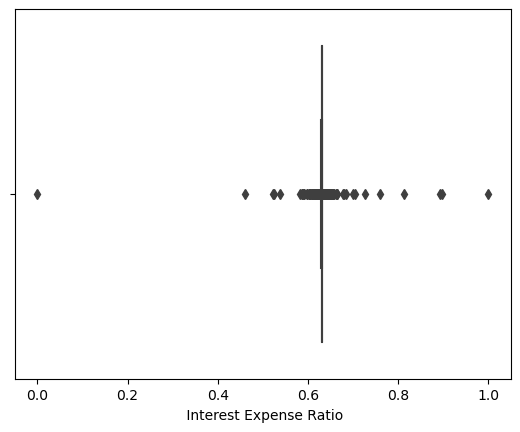

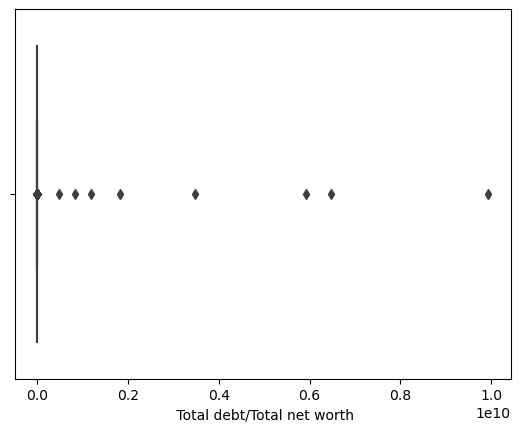

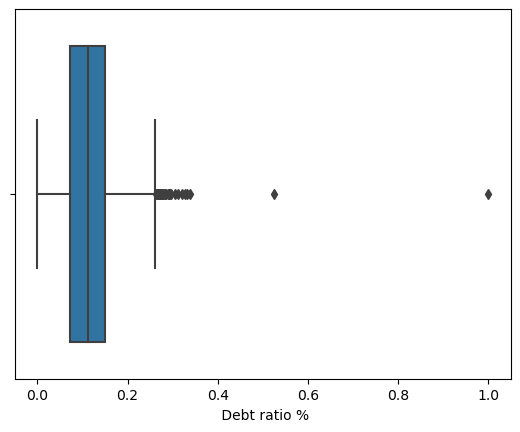

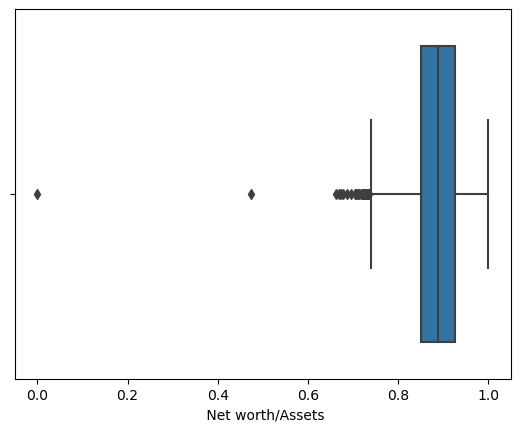

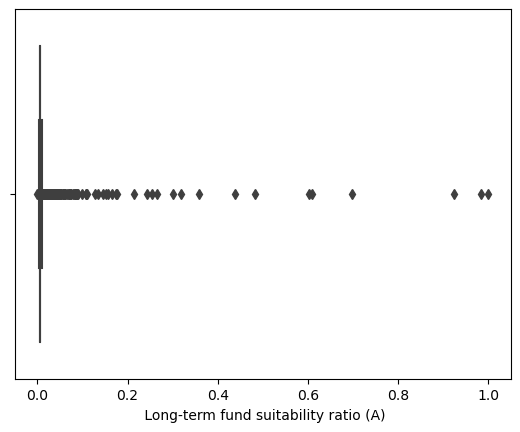

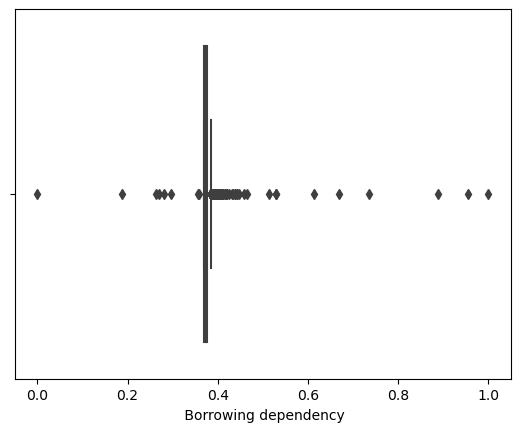

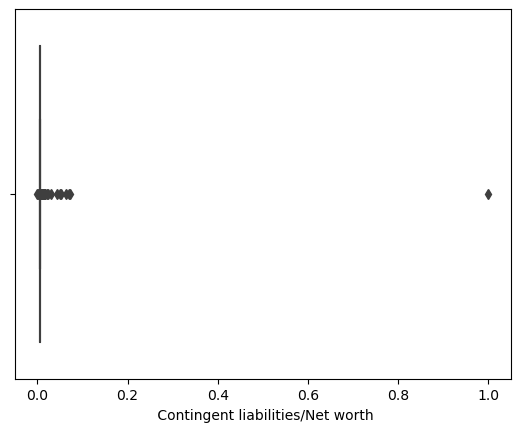

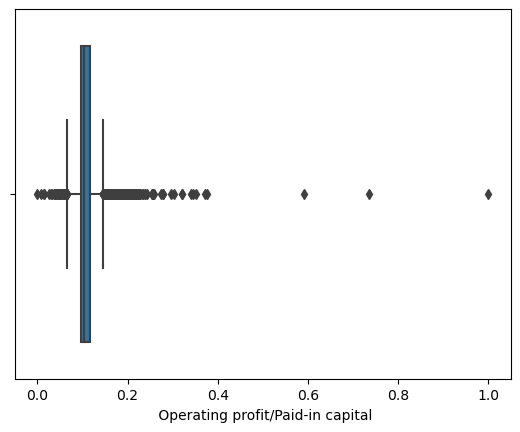

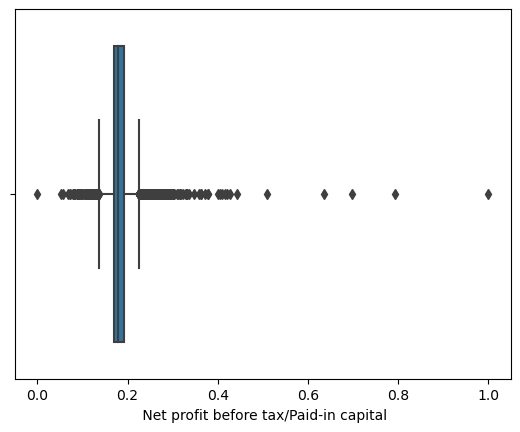

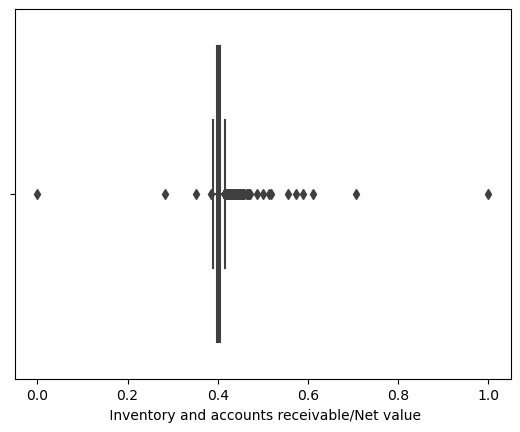

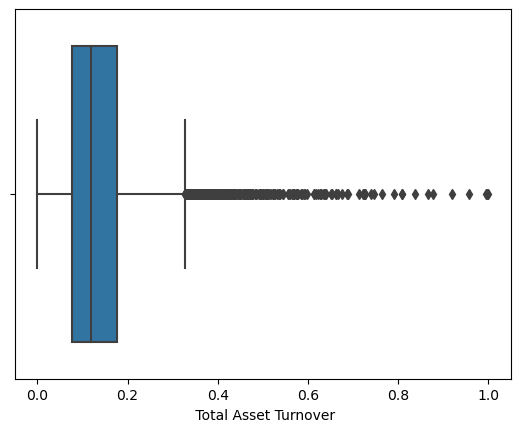

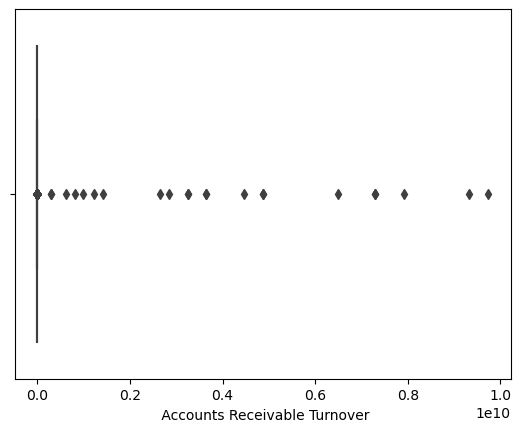

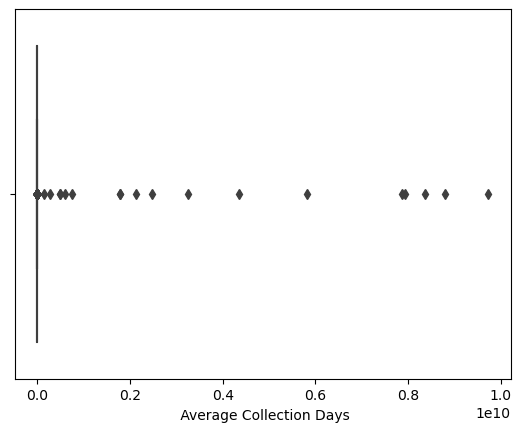

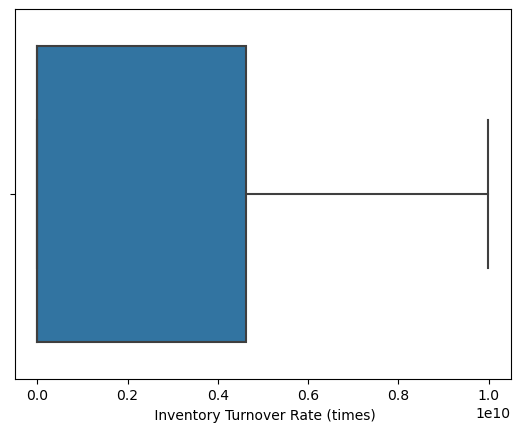

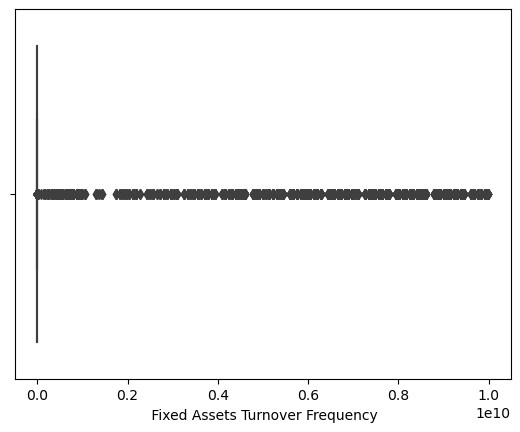

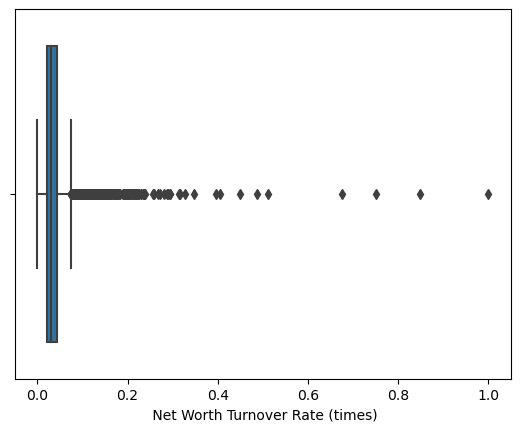

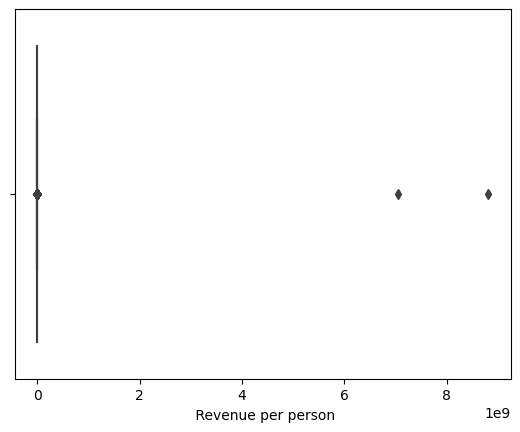

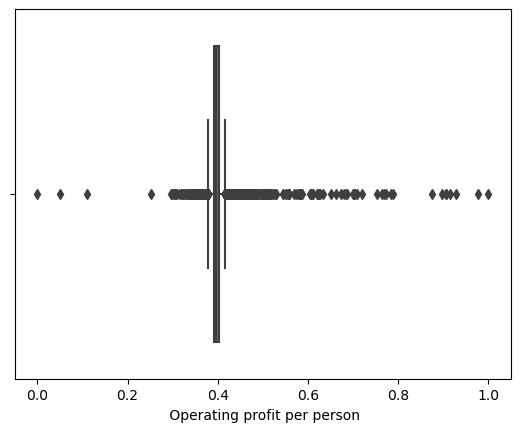

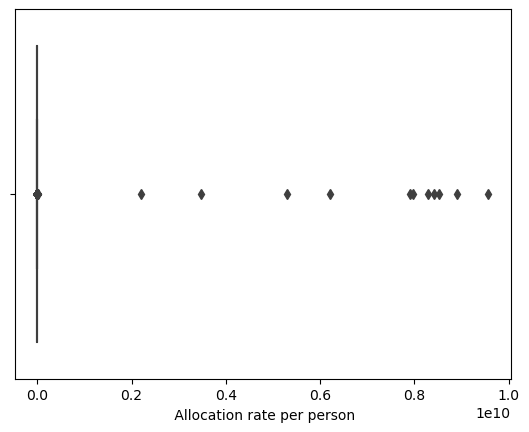

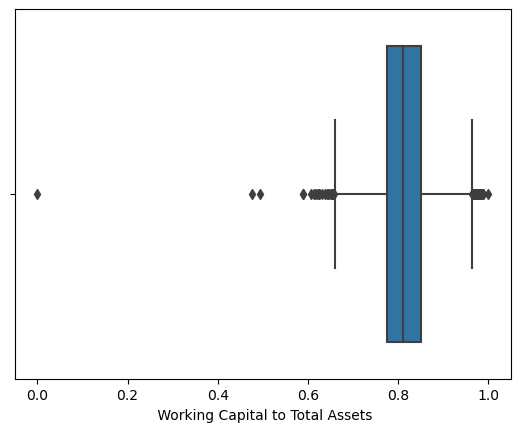

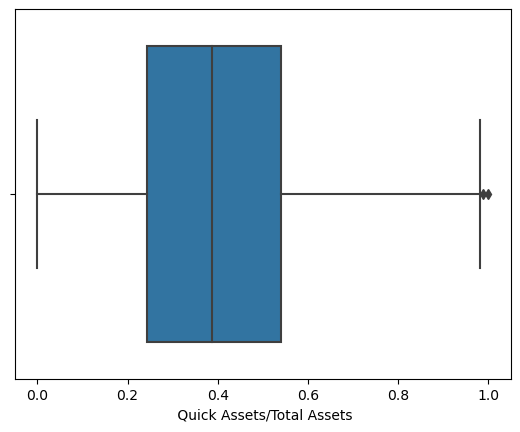

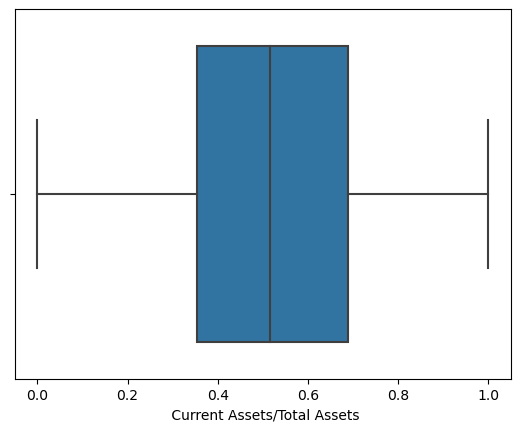

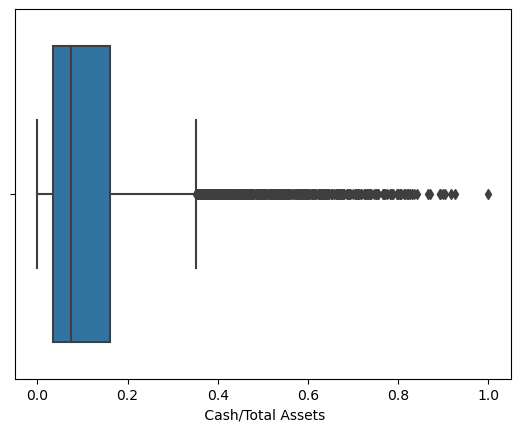

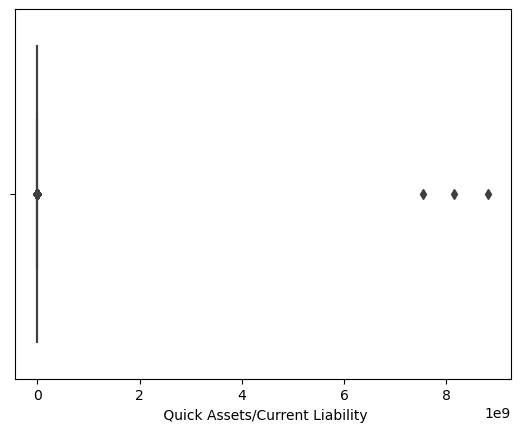

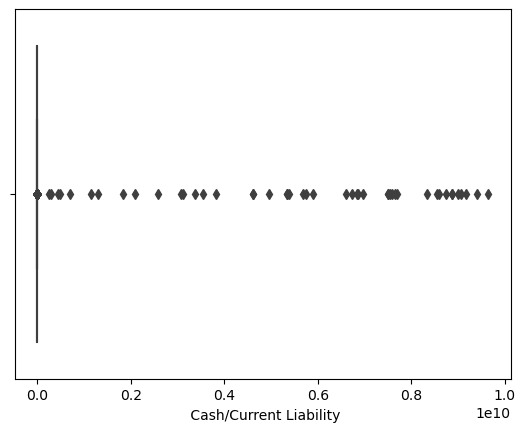

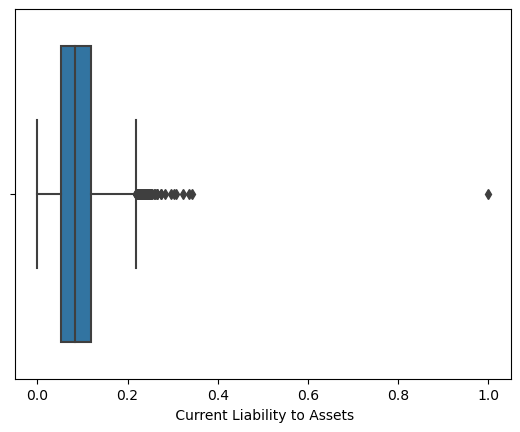

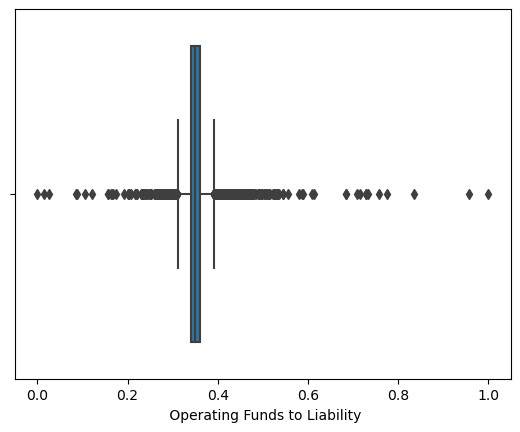

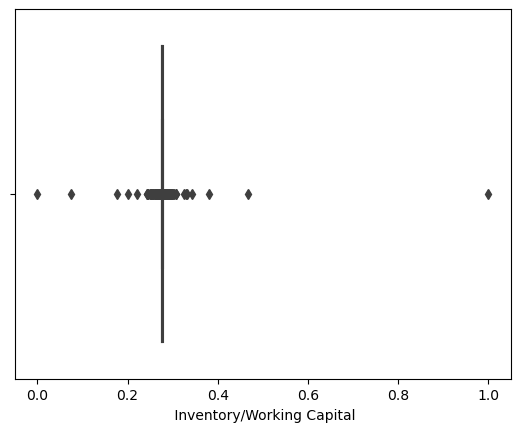

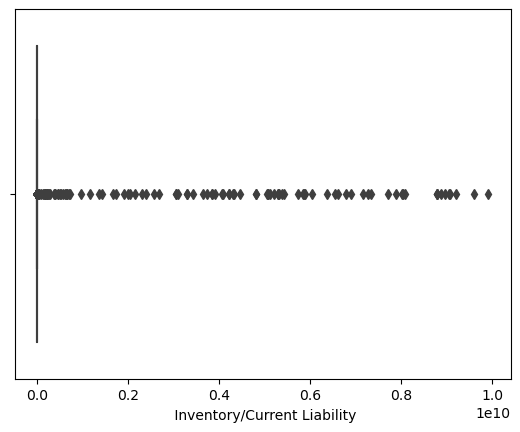

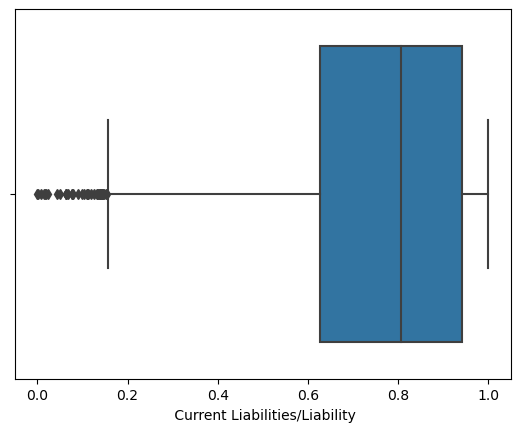

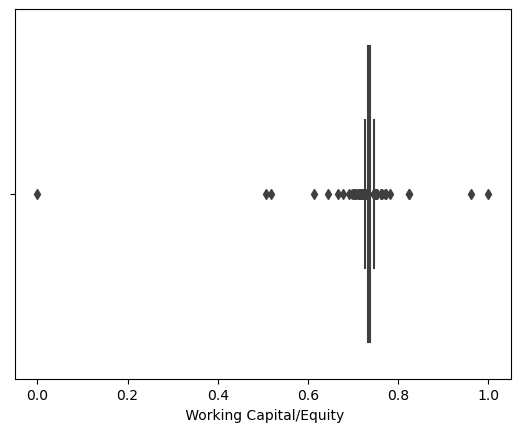

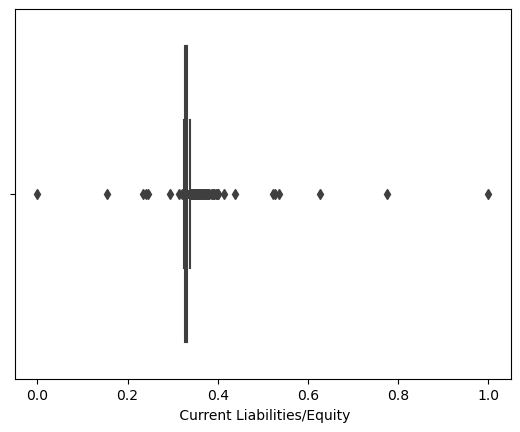

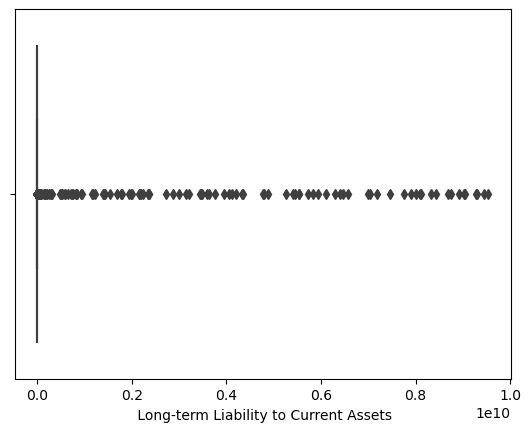

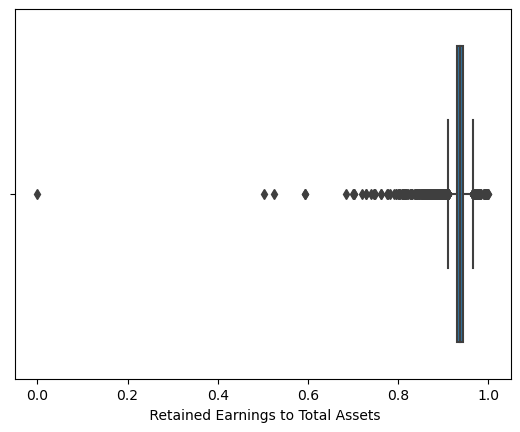

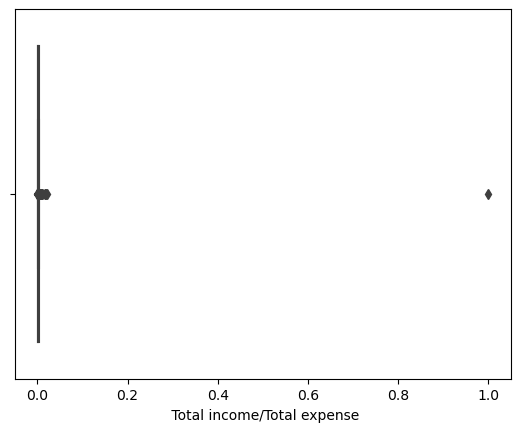

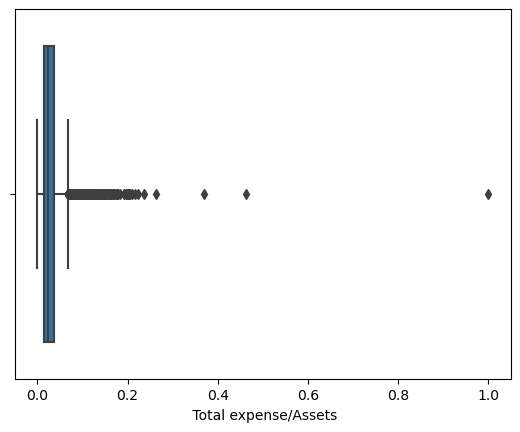

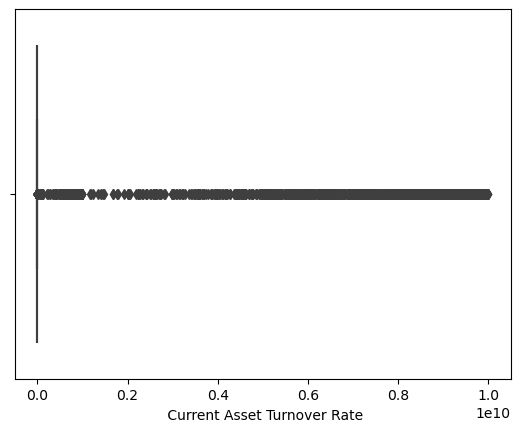

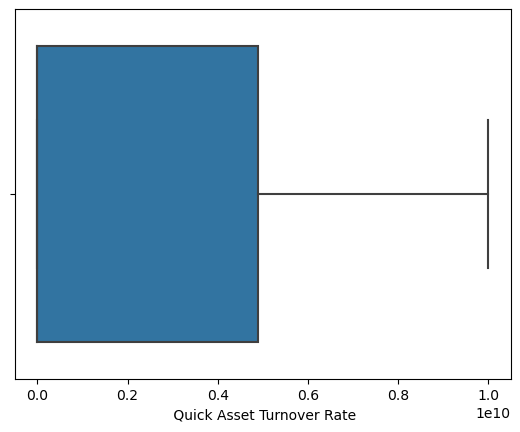

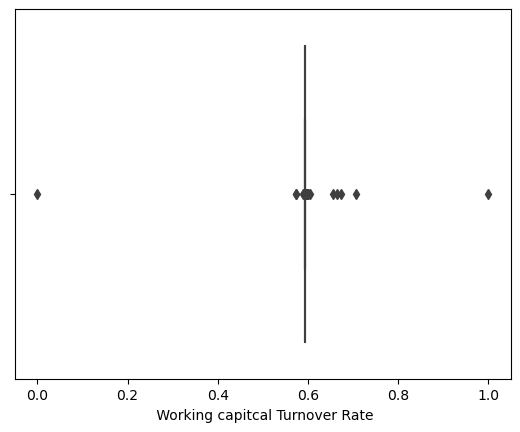

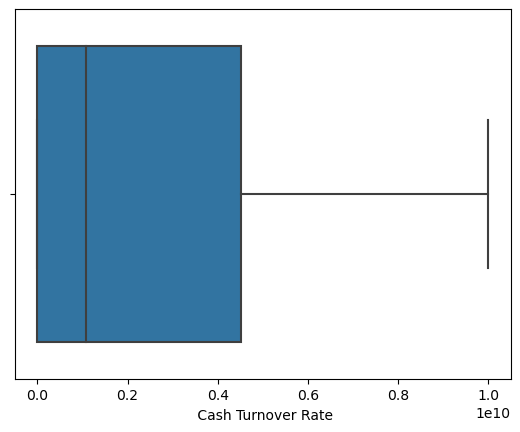

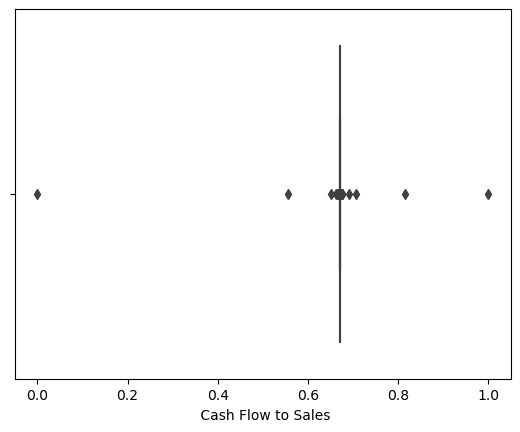

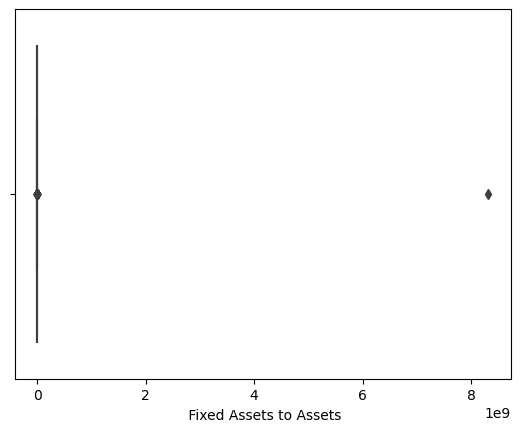

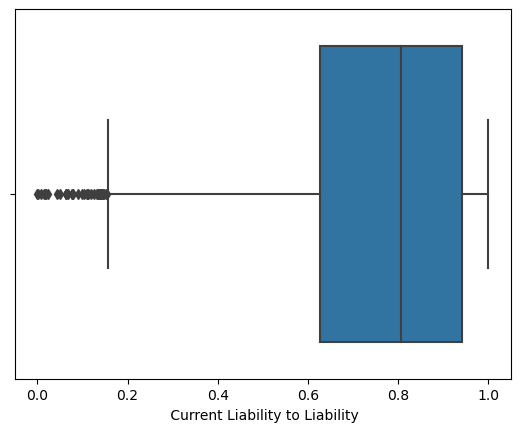

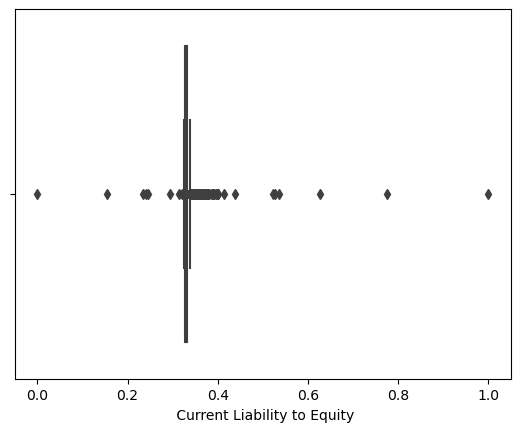

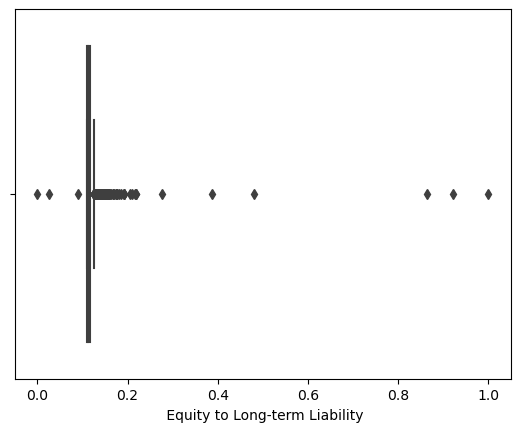

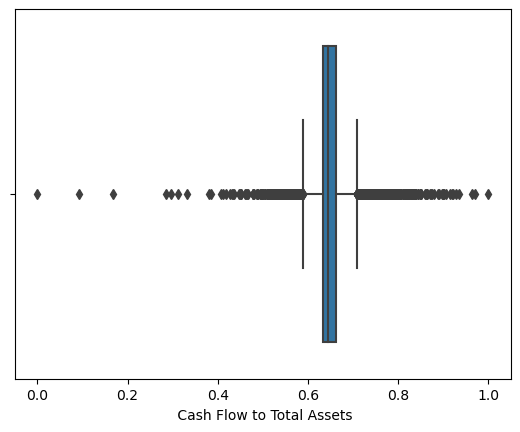

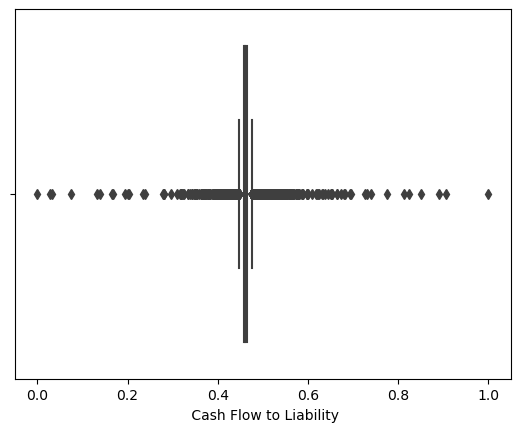

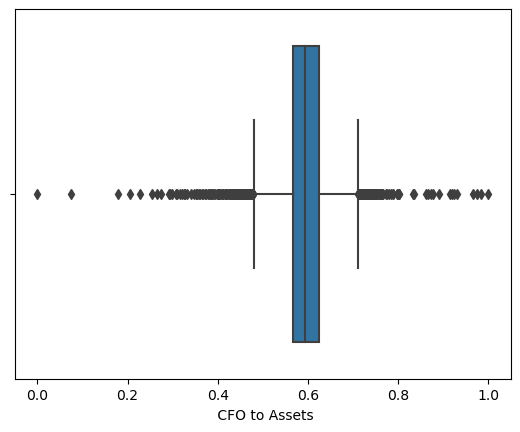

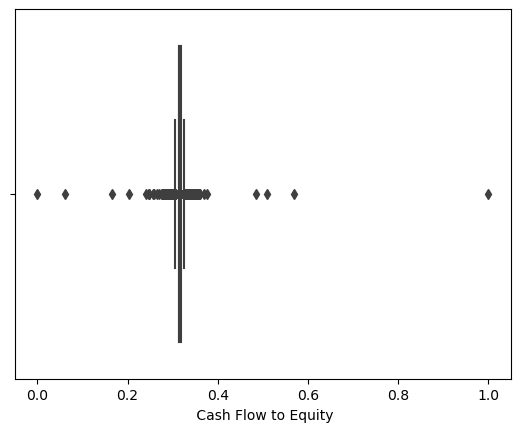

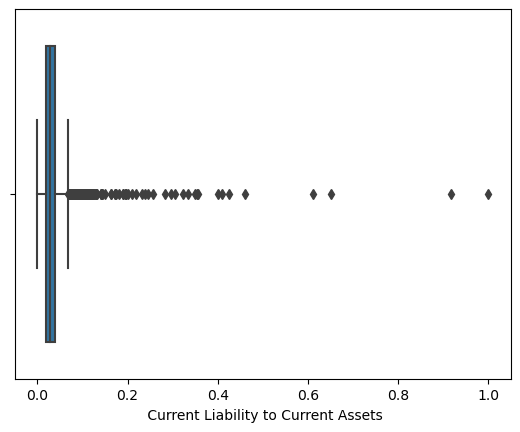

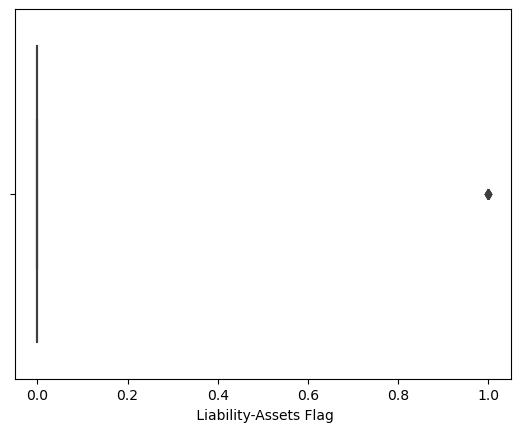

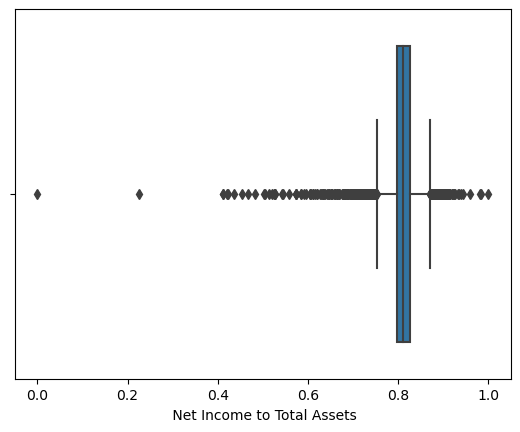

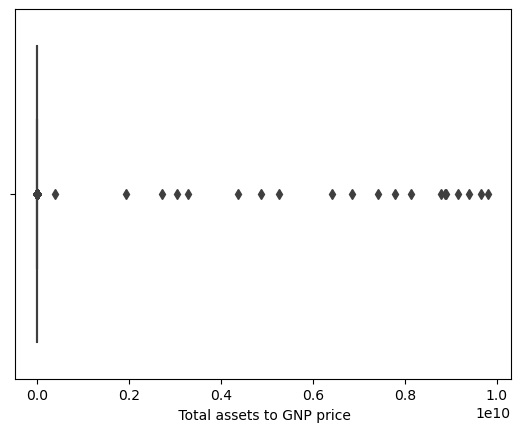

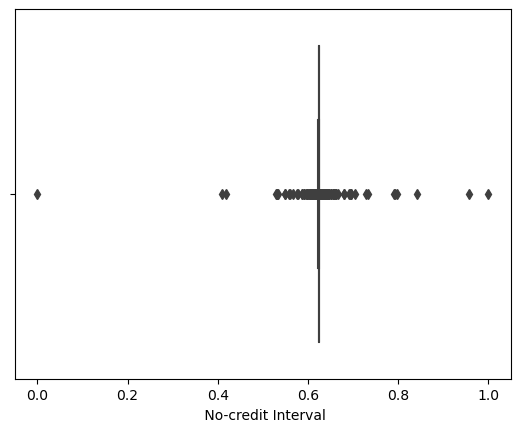

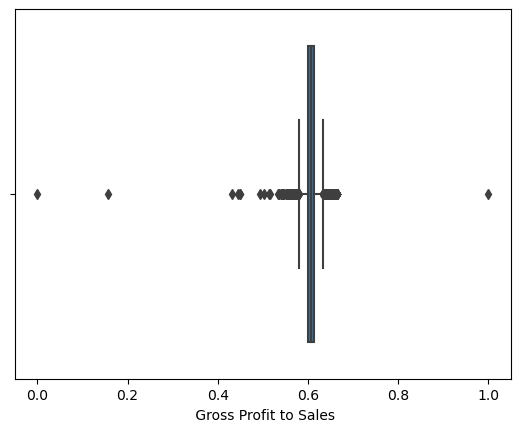

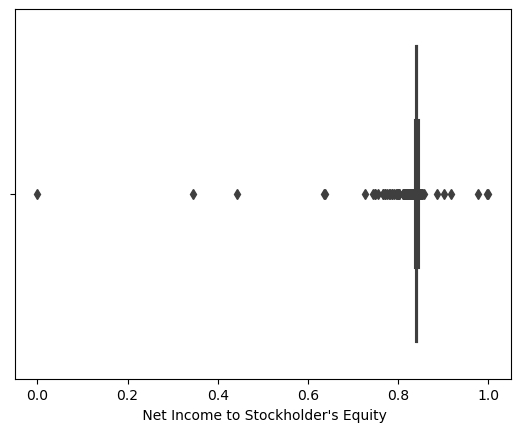

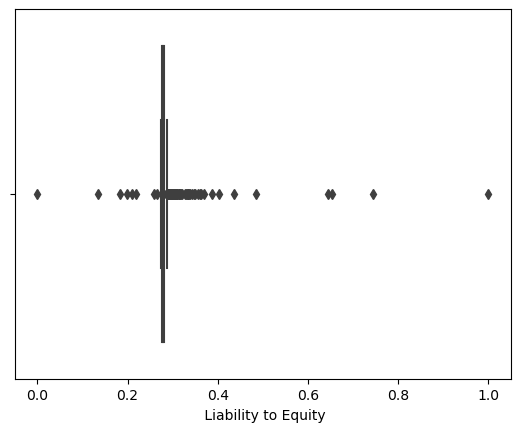

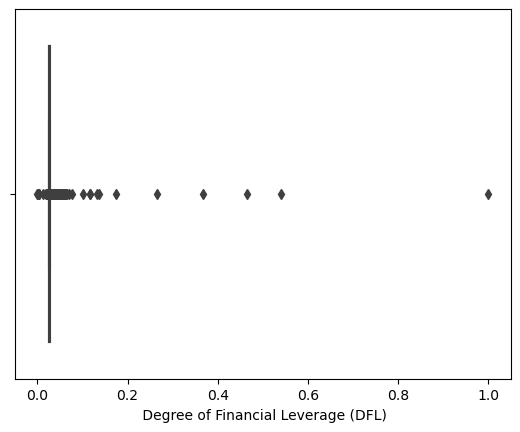

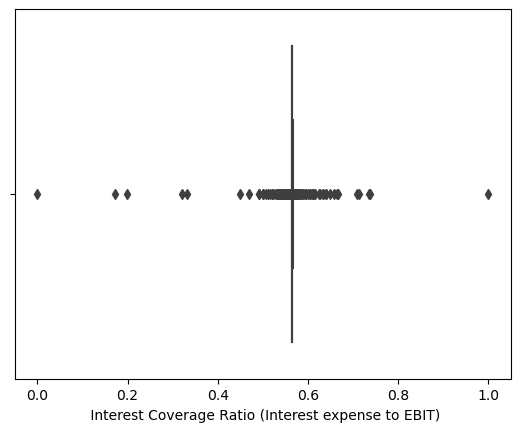

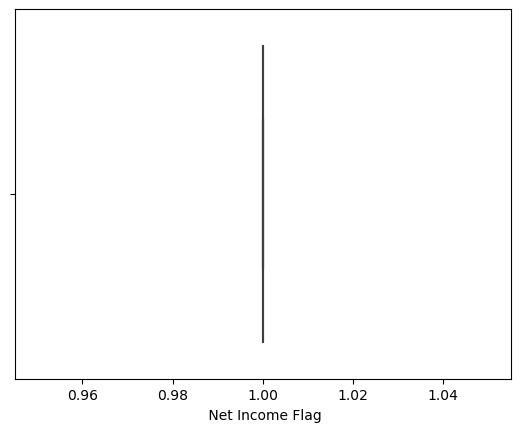

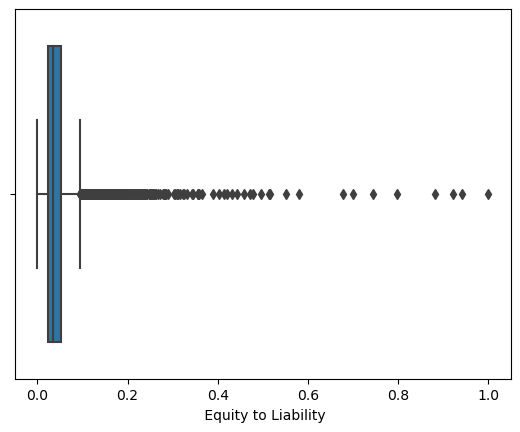

In [24]:
for i in num_data.columns:
    sns.boxplot(x=data[i])  # Use 'data' instead of 'num_data'
    plt.show()

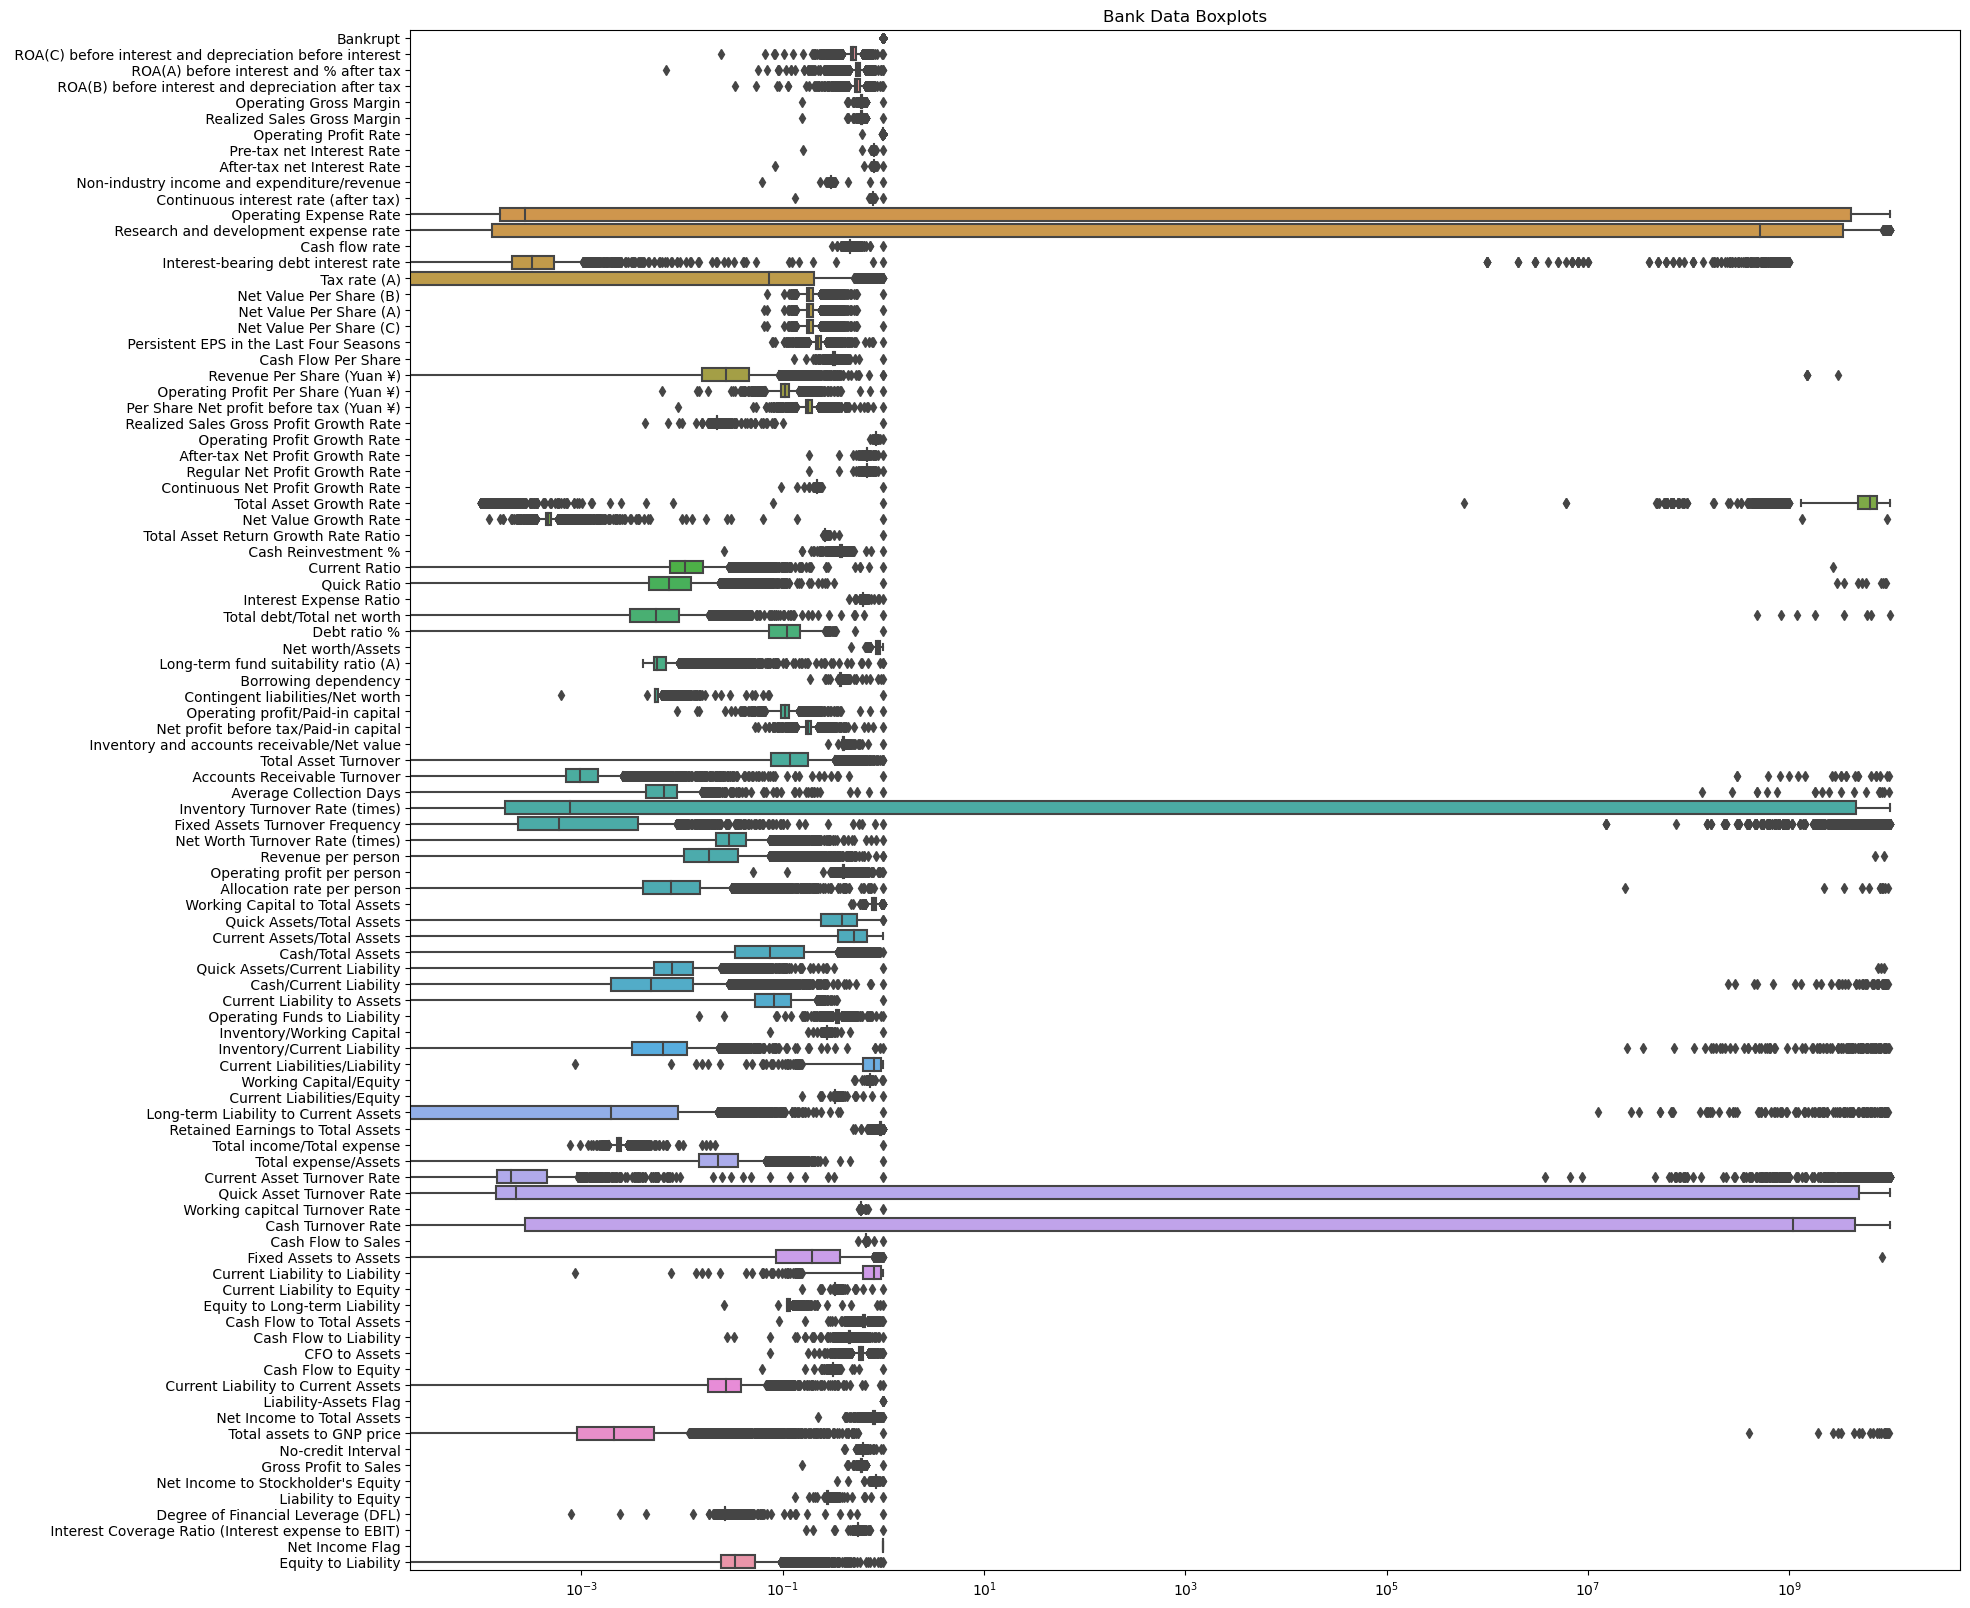

In [25]:
plt.figure(figsize = (20,20))
ax =sns.boxplot(data = data, orient="h")
ax.set_title('Bank Data Boxplots')
ax.set(xscale="log")
plt.show()

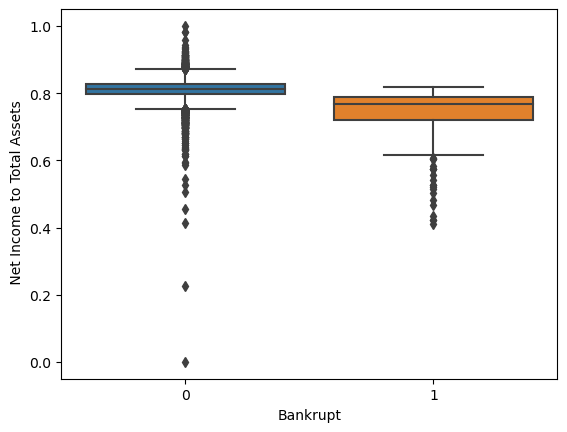

In [26]:
sns.boxplot(x="Bankrupt", y=" Net Income to Total Assets", data=data) #boxplot show X and Y
plt.show()

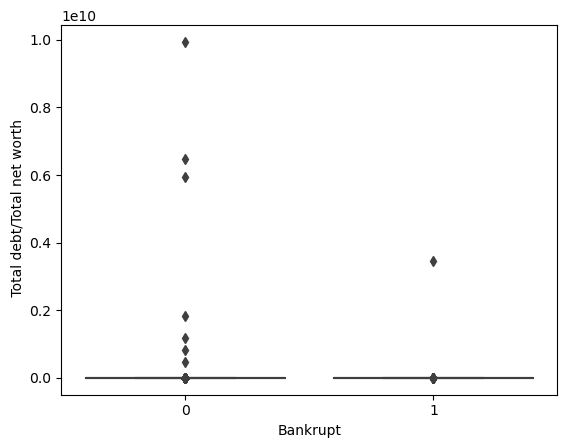

In [27]:
sns.boxplot(x="Bankrupt", y=" Total debt/Total net worth", data=data) 
plt.show()

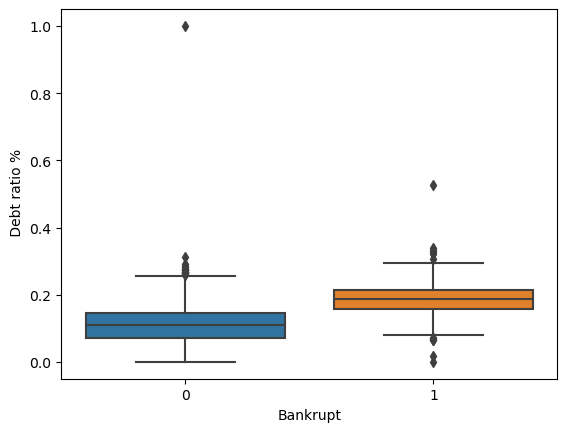

In [28]:
sns.boxplot(x="Bankrupt", y=" Debt ratio %", data=data)
plt.show()

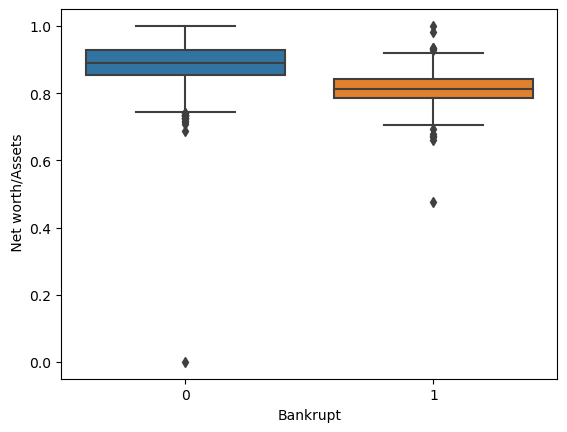

In [29]:
sns.boxplot(x="Bankrupt", y=' Net worth/Assets', data=data)
plt.show()

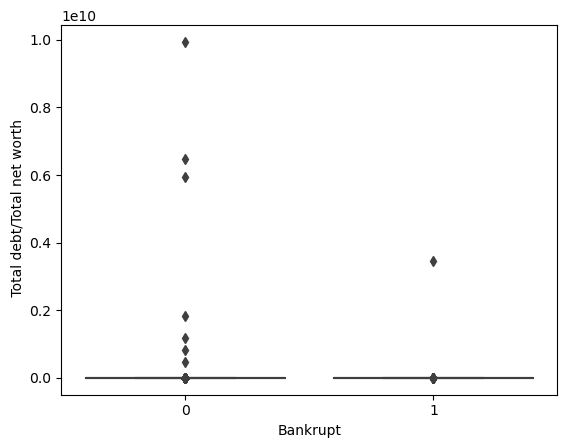

In [30]:
sns.boxplot(x="Bankrupt", y=" Total debt/Total net worth", data=data)

plt.show()

<Axes: xlabel='Bankrupt', ylabel=' Net worth/Assets'>

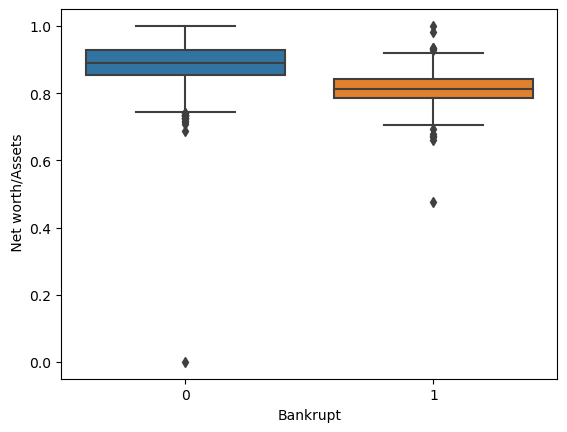

In [31]:
sns.boxplot(x="Bankrupt", y=' Net worth/Assets', data=data)

<Axes: xlabel='Bankrupt', ylabel=' Debt ratio %'>

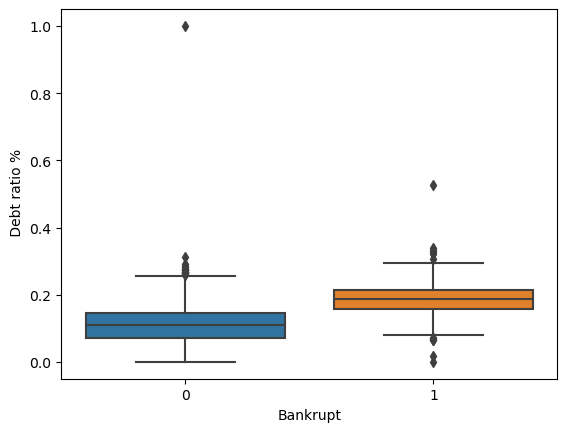

In [32]:
sns.boxplot(x="Bankrupt", y=" Debt ratio %", data=data)

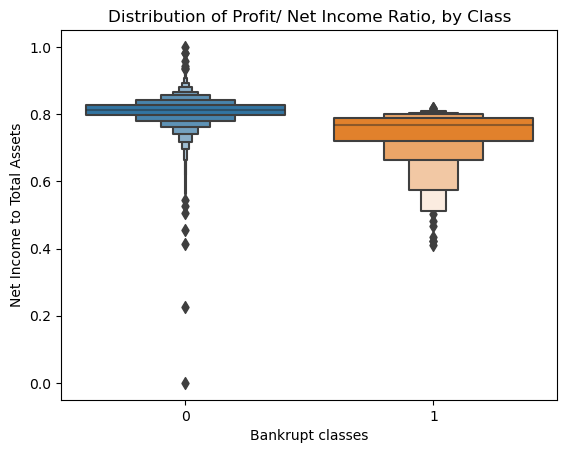

In [33]:
sns.boxenplot(x="Bankrupt" , y=" Net Income to Total Assets" , data=data)
plt.xlabel("Bankrupt classes")
plt.ylabel("Net Income to Total Assets")
plt.title("Distribution of Profit/ Net Income Ratio, by Class");

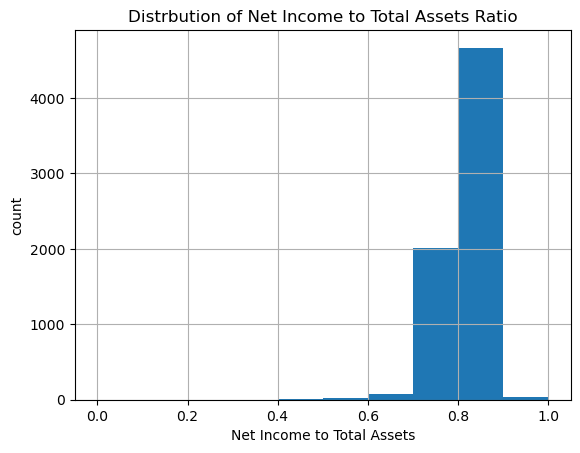

In [34]:
data[" Net Income to Total Assets"].hist()
plt.xlabel("Net Income to Total Assets")
plt.ylabel("count")
plt.title("Distrbution of Net Income to Total Assets Ratio");

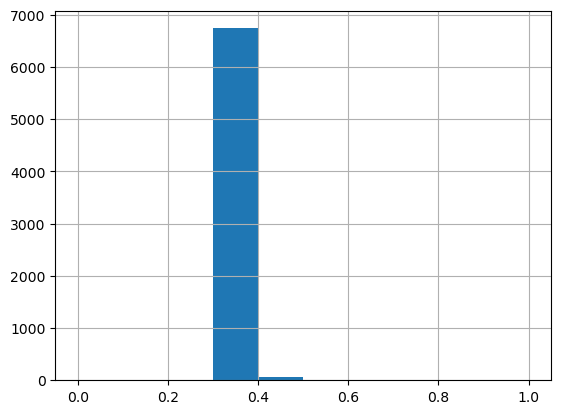

In [35]:
data[' Borrowing dependency'].hist();

# Outliers detection and removal

In [36]:
from scipy import stats
z_scores = stats.zscore(data['Bankrupt'])
z_score_outliers = (z_scores < -3) | (z_scores > 3)
z_score_outlier_rows = data[z_score_outliers]
print("Outliers Detected by Z-Score:")
print(z_score_outlier_rows)
threshold = 3
new_data = data[(z_scores < threshold) & (z_scores > -threshold)]



Outliers Detected by Z-Score:
      Bankrupt   ROA(C) before interest and depreciation before interest  \
0            1                                           0.370594          
1            1                                           0.464291          
2            1                                           0.426071          
3            1                                           0.399844          
4            1                                           0.465022          
...        ...                                                ...          
6591         1                                           0.418515          
6640         1                                           0.196802          
6641         1                                           0.337640          
6642         1                                           0.340028          
6728         1                                           0.492176          

       ROA(A) before interest and % after tax  \
0       

In [37]:
new_data

,Bankrupt,ROA(C) before interest and depreciation before interest,ROA(A) before interest and % after tax,ROA(B) before interest and depreciation after tax,Operating Gross Margin,Realized Sales Gross Margin,Operating Profit Rate,Pre-tax net Interest Rate,After-tax net Interest Rate,Non-industry income and expenditure/revenue,...,Net Income to Total Assets,Total assets to GNP price,No-credit Interval,Gross Profit to Sales,Net Income to Stockholder's Equity,Liability to Equity,Degree of Financial Leverage (DFL),Interest Coverage Ratio (Interest expense to EBIT),Net Income Flag,Equity to Liability
6,0,0.390923,0.445704,0.436158,0.619950,0.619950,0.998993,0.797012,0.808960,0.302814,...,0.736619,0.018372,0.623655,0.619949,0.829980,0.292504,0.026622,0.564200,1,0.015663
7,0,0.508361,0.570922,0.559077,0.601738,0.601717,0.999009,0.797449,0.809362,0.303545,...,0.815350,0.010005,0.623843,0.601739,0.841459,0.278607,0.027031,0.566089,1,0.034889
8,0,0.488519,0.545137,0.543284,0.603612,0.603612,0.998961,0.797414,0.809338,0.303584,...,0.803647,0.000824,0.623977,0.603613,0.840487,0.276423,0.026891,0.565592,1,0.065826
9,0,0.495686,0.550916,0.542963,0.599209,0.599209,0.999001,0.797404,0.809320,0.303483,...,0.804195,0.005798,0.623865,0.599205,0.840688,0.279388,0.027243,0.566668,1,0.030801
10,0,0.482475,0.567543,0.538198,0.614026,0.614026,0.998978,0.797535,0.809460,0.303759,...,0.814111,0.076972,0.623687,0.614021,0.841337,0.278356,0.026971,0.565892,1,0.036572
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6814,0,0.493687,0.539468,0.543230,0.604455,0.604462,0.998992,0.797409,0.809331,0.303510,...,0.799927,0.000466,0.623620,0.604455,0.840359,0.279606,0.027064,0.566193,1,0.029890
6815,0,0.475162,0.538269,0.524172,0.598308,0.598308,0.998992,0.797414,0.809327,0.303520,...,0.799748,0.001959,0.623931,0.598306,0.840306,0.278132,0.027009,0.566018,1,0.038284
6816,0,0.472725,0.533744,0.520638,0.610444,0.610213,0.998984,0.797401,0.809317,0.303512,...,0.797778,0.002840,0.624156,0.610441,0.840138,0.275789,0.026791,0.565158,1,0.097649
6817,0,0.506264,0.559911,0.554045,0.607850,0.607850,0.999074,0.797500,0.809399,0.303498,...,0.811808,0.002837,0.623957,0.607846,0.841084,0.277547,0.026822,0.565302,1,0.044009


# Logistic Regression

In [38]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import mean_absolute_error,mean_squared_error,r2_score
from sklearn.preprocessing import OneHotEncoder,StandardScaler 
from sklearn.compose import ColumnTransformer
import joblib

import warnings
warnings.filterwarnings("ignore")


In [39]:
x=data.drop(['Bankrupt'],axis=1)#x values
y=data['Bankrupt']#y values

In [40]:
x

,ROA(C) before interest and depreciation before interest,ROA(A) before interest and % after tax,ROA(B) before interest and depreciation after tax,Operating Gross Margin,Realized Sales Gross Margin,Operating Profit Rate,Pre-tax net Interest Rate,After-tax net Interest Rate,Non-industry income and expenditure/revenue,Continuous interest rate (after tax),...,Net Income to Total Assets,Total assets to GNP price,No-credit Interval,Gross Profit to Sales,Net Income to Stockholder's Equity,Liability to Equity,Degree of Financial Leverage (DFL),Interest Coverage Ratio (Interest expense to EBIT),Net Income Flag,Equity to Liability
0,0.370594,0.424389,0.405750,0.601457,0.601457,0.998969,0.796887,0.808809,0.302646,0.780985,...,0.716845,0.009219,0.622879,0.601453,0.827890,0.290202,0.026601,0.564050,1,0.016469
1,0.464291,0.538214,0.516730,0.610235,0.610235,0.998946,0.797380,0.809301,0.303556,0.781506,...,0.795297,0.008323,0.623652,0.610237,0.839969,0.283846,0.264577,0.570175,1,0.020794
2,0.426071,0.499019,0.472295,0.601450,0.601364,0.998857,0.796403,0.808388,0.302035,0.780284,...,0.774670,0.040003,0.623841,0.601449,0.836774,0.290189,0.026555,0.563706,1,0.016474
3,0.399844,0.451265,0.457733,0.583541,0.583541,0.998700,0.796967,0.808966,0.303350,0.781241,...,0.739555,0.003252,0.622929,0.583538,0.834697,0.281721,0.026697,0.564663,1,0.023982
4,0.465022,0.538432,0.522298,0.598783,0.598783,0.998973,0.797366,0.809304,0.303475,0.781550,...,0.795016,0.003878,0.623521,0.598782,0.839973,0.278514,0.024752,0.575617,1,0.035490
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6814,0.493687,0.539468,0.543230,0.604455,0.604462,0.998992,0.797409,0.809331,0.303510,0.781588,...,0.799927,0.000466,0.623620,0.604455,0.840359,0.279606,0.027064,0.566193,1,0.029890
6815,0.475162,0.538269,0.524172,0.598308,0.598308,0.998992,0.797414,0.809327,0.303520,0.781586,...,0.799748,0.001959,0.623931,0.598306,0.840306,0.278132,0.027009,0.566018,1,0.038284
6816,0.472725,0.533744,0.520638,0.610444,0.610213,0.998984,0.797401,0.809317,0.303512,0.781546,...,0.797778,0.002840,0.624156,0.610441,0.840138,0.275789,0.026791,0.565158,1,0.097649
6817,0.506264,0.559911,0.554045,0.607850,0.607850,0.999074,0.797500,0.809399,0.303498,0.781663,...,0.811808,0.002837,0.623957,0.607846,0.841084,0.277547,0.026822,0.565302,1,0.044009


In [41]:
y

0       1
1       1
2       1
3       1
4       1
       ..
6814    0
6815    0
6816    0
6817    0
6818    0
Name: Bankrupt, Length: 6819, dtype: int64

In [42]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=42)

In [43]:
log=LogisticRegression()
log.fit(x_train,y_train)

LogisticRegression()

In [44]:
print("Train Score ",log.score(x_train,y_train))
print("Test Score ",log.score(x_test,y_test))

Train Score  0.9677360219981668
Test Score  0.9611436950146628


In [45]:
pred_train=log.predict(x_train)
pred_test=log.predict(x_test)

In [46]:
from sklearn import metrics
print(metrics.classification_report(y_train,pred_train))

              precision    recall  f1-score   support

           0       0.97      1.00      0.98      5286
           1       0.27      0.02      0.04       169

    accuracy                           0.97      5455
   macro avg       0.62      0.51      0.51      5455
weighted avg       0.95      0.97      0.95      5455



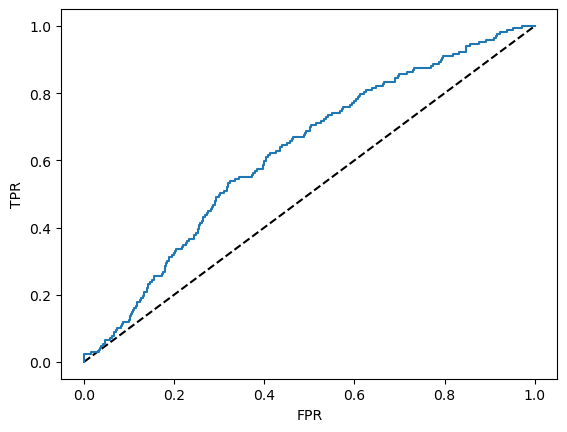

In [47]:
roc=log.predict_proba(x_train)[:,1]

fpr,tpr,threshold  = metrics.roc_curve(y_train, roc)
plt.plot([0,1],[0,1],'k--')
plt.plot(fpr,tpr,label='logistic')
plt.ylabel("TPR")
plt.xlabel("FPR")
plt.show()

In [48]:
metrics.roc_auc_score(y_train,roc)

0.6233704303205744

# Grid search

In [48]:
param_grid={
    'penalty':['l1','l2'],#lasso ridge
    'C':[0.1,0.5,1,5,10]
}

In [49]:
from sklearn.model_selection import GridSearchCV
grid=GridSearchCV(estimator=log,param_grid=param_grid,cv=5)

In [50]:
grid.fit(x_train,y_train)

GridSearchCV(cv=5, estimator=LogisticRegression(),
             param_grid={'C': [0.1, 0.5, 1, 5, 10], 'penalty': ['l1', 'l2']})

In [51]:
best_param=grid.best_params_
best_model=grid.best_estimator_

In [52]:
y_pred=best_model.predict(x_test)

In [53]:
from sklearn.metrics import accuracy_score , precision_score,recall_score,f1_score,roc_auc_score
acc=accuracy_score(y_test,y_pred)
pre=precision_score(y_test,y_pred)
rec=recall_score(y_test,y_pred)
f1=f1_score(y_test,y_pred)
roc_auc=roc_auc_score(y_test,y_pred)

In [54]:
print("Best Param: ",best_param)
print("Accuracy:   ",acc)
print("Precision:  ",pre)
print("Recall:     ",rec)
print("f1 Scoer:   ",f1)
print("AUC ROC:    ",roc_auc)

Best Param:  {'C': 0.1, 'penalty': 'l2'}
Accuracy:    0.9611436950146628
Precision:   0.0
Recall:      0.0
f1 Scoer:    0.0
AUC ROC:     0.4992383853769992


# RandomizedSearch

In [55]:
from scipy.stats import loguniform
from sklearn.model_selection import RandomizedSearchCV

In [56]:
logistic_random_param={'C':loguniform(1e-4,1e0),
                      'max_iter':(np.arange(100,800,10))}
grid=RandomizedSearchCV(estimator=log, param_distributions=logistic_random_param, cv=5)

In [57]:
grid.fit(x_train,y_train)

RandomizedSearchCV(cv=5, estimator=LogisticRegression(),
                   param_distributions={'C': <scipy.stats._distn_infrastructure.rv_continuous_frozen object at 0x000002037573D690>,
                                        'max_iter': array([100, 110, 120, 130, 140, 150, 160, 170, 180, 190, 200, 210, 220,
       230, 240, 250, 260, 270, 280, 290, 300, 310, 320, 330, 340, 350,
       360, 370, 380, 390, 400, 410, 420, 430, 440, 450, 460, 470, 480,
       490, 500, 510, 520, 530, 540, 550, 560, 570, 580, 590, 600, 610,
       620, 630, 640, 650, 660, 670, 680, 690, 700, 710, 720, 730, 740,
       750, 760, 770, 780, 790])})

In [58]:
best_param = grid.best_params_
best_model = grid.best_estimator_
y_pred = best_model.predict(x_test)

In [59]:
acc=accuracy_score(y_test,y_pred)
pre=precision_score(y_test,y_pred)
rec=recall_score(y_test,y_pred)
f1=f1_score(y_test,y_pred)
roc_auc=roc_auc_score(y_test,y_pred)

In [60]:
print('Best Param: ',best_param)
print('Accuracy:   ',acc)
print('Precision:  ',pre)
print('Recall:     ',rec)
print('F1Score:    ',f1)
print('ROC_AUC:    ',roc_auc)

Best Param:  {'C': 0.18970209924610734, 'max_iter': 150}
Accuracy:    0.9611436950146628
Precision:   0.0
Recall:      0.0
F1Score:     0.0
ROC_AUC:     0.4992383853769992


# SVM & Naive Bayes

In [61]:
x

,ROA(C) before interest and depreciation before interest,ROA(A) before interest and % after tax,ROA(B) before interest and depreciation after tax,Operating Gross Margin,Realized Sales Gross Margin,Operating Profit Rate,Pre-tax net Interest Rate,After-tax net Interest Rate,Non-industry income and expenditure/revenue,Continuous interest rate (after tax),...,Net Income to Total Assets,Total assets to GNP price,No-credit Interval,Gross Profit to Sales,Net Income to Stockholder's Equity,Liability to Equity,Degree of Financial Leverage (DFL),Interest Coverage Ratio (Interest expense to EBIT),Net Income Flag,Equity to Liability
0,0.370594,0.424389,0.405750,0.601457,0.601457,0.998969,0.796887,0.808809,0.302646,0.780985,...,0.716845,0.009219,0.622879,0.601453,0.827890,0.290202,0.026601,0.564050,1,0.016469
1,0.464291,0.538214,0.516730,0.610235,0.610235,0.998946,0.797380,0.809301,0.303556,0.781506,...,0.795297,0.008323,0.623652,0.610237,0.839969,0.283846,0.264577,0.570175,1,0.020794
2,0.426071,0.499019,0.472295,0.601450,0.601364,0.998857,0.796403,0.808388,0.302035,0.780284,...,0.774670,0.040003,0.623841,0.601449,0.836774,0.290189,0.026555,0.563706,1,0.016474
3,0.399844,0.451265,0.457733,0.583541,0.583541,0.998700,0.796967,0.808966,0.303350,0.781241,...,0.739555,0.003252,0.622929,0.583538,0.834697,0.281721,0.026697,0.564663,1,0.023982
4,0.465022,0.538432,0.522298,0.598783,0.598783,0.998973,0.797366,0.809304,0.303475,0.781550,...,0.795016,0.003878,0.623521,0.598782,0.839973,0.278514,0.024752,0.575617,1,0.035490
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6814,0.493687,0.539468,0.543230,0.604455,0.604462,0.998992,0.797409,0.809331,0.303510,0.781588,...,0.799927,0.000466,0.623620,0.604455,0.840359,0.279606,0.027064,0.566193,1,0.029890
6815,0.475162,0.538269,0.524172,0.598308,0.598308,0.998992,0.797414,0.809327,0.303520,0.781586,...,0.799748,0.001959,0.623931,0.598306,0.840306,0.278132,0.027009,0.566018,1,0.038284
6816,0.472725,0.533744,0.520638,0.610444,0.610213,0.998984,0.797401,0.809317,0.303512,0.781546,...,0.797778,0.002840,0.624156,0.610441,0.840138,0.275789,0.026791,0.565158,1,0.097649
6817,0.506264,0.559911,0.554045,0.607850,0.607850,0.999074,0.797500,0.809399,0.303498,0.781663,...,0.811808,0.002837,0.623957,0.607846,0.841084,0.277547,0.026822,0.565302,1,0.044009


In [62]:
y

0       1
1       1
2       1
3       1
4       1
       ..
6814    0
6815    0
6816    0
6817    0
6818    0
Name: Bankrupt, Length: 6819, dtype: int64

In [63]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score,classification_report

In [64]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=42)

In [65]:
scaler=StandardScaler()
x_train=scaler.fit_transform(x_train)
x_test=scaler.fit_transform(x_test)

In [66]:
svcm=SVC(kernel='linear')

In [67]:
svcm.fit(x_train,y_train)

SVC(kernel='linear')

In [68]:
y_pred=svcm.predict(x_test)
acc=accuracy_score(y_test,y_pred)
acc


0.9618768328445748

In [69]:
print("Accuracy: {:.2f}%".format(acc*100))

Accuracy: 96.19%


In [70]:
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.96      1.00      0.98      1313
           1       0.33      0.02      0.04        51

    accuracy                           0.96      1364
   macro avg       0.65      0.51      0.51      1364
weighted avg       0.94      0.96      0.95      1364



In [71]:
from sklearn.metrics import confusion_matrix
cm=confusion_matrix(y_test,y_pred)
print("Confusion Matrix")
print(cm)

Confusion Matrix
[[1311    2]
 [  50    1]]


<Axes: >

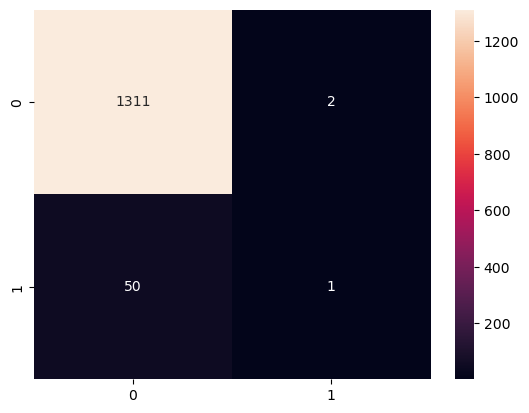

In [72]:
sns.heatmap(cm,annot=True,fmt='.5g')

In [73]:
from sklearn.svm import SVC
from sklearn.metrics import roc_curve, auc
from sklearn.preprocessing import label_binarize
from sklearn.multiclass import OneVsRestClassifier

yb = label_binarize(y, classes=[0,1])
nc=yb.shape[1]
classifier = OneVsRestClassifier(SVC(kernel="linear", probability=True, random_state=42,decision_function_shape='ovr'))
y_score=classifier.fit(x_train,y_train).decision_function(x_test)


In [74]:
from sklearn.metrics import roc_curve, auc

fpr = dict()
tpr = dict()
roc_auc = dict()
for i in range(nc):
    fpr[i], tpr[i], _ = roc_curve(y_test, y_score, pos_label=i)
    roc_auc[i] = auc(fpr[i], tpr[i])


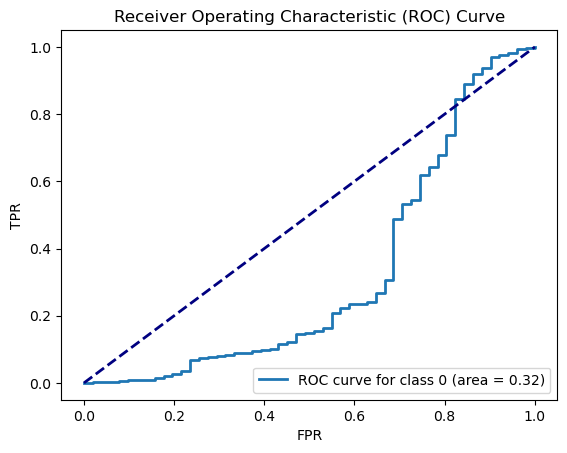

In [75]:
plt.figure()
for i in range(nc):
    plt.plot(fpr[i], tpr[i], lw=2, label='ROC curve for class {} (area = {:.2f})'.format(i, roc_auc[i]))
plt.plot([0, 1], [0, 1], 'k--', lw=2, color='navy')
plt.xlabel('FPR')
plt.ylabel('TPR')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc='lower right')
plt.show()

# GridSearch

In [76]:
from sklearn.model_selection import GridSearchCV

In [77]:
param_grid = {
'C' : [0.1, 1, 10, 100],
'kernel' : ['linear', 'rbf', 'poly', 'sigmoid']
}

In [78]:
svcm = SVC()

In [79]:
grid_search = GridSearchCV(svcm, param_grid, cv=5)

In [80]:
grid_search.fit(x_train, y_train)

GridSearchCV(cv=5, estimator=SVC(),
             param_grid={'C': [0.1, 1, 10, 100],
                         'kernel': ['linear', 'rbf', 'poly', 'sigmoid']})

In [81]:
best_param = grid_search.best_params_
print("Best hyperparameter : ", best_param)

Best hyperparameter :  {'C': 0.1, 'kernel': 'rbf'}


In [82]:
best_svm = SVC(C=best_param['C'], kernel=best_param['kernel'])

In [83]:
best_svm.fit(x_train, y_train)

SVC(C=0.1)

In [84]:
y_pred = best_svm.predict(x_test)
acc = accuracy_score(y_test, y_pred)
print("Accuracy : {:.2f}%". format(acc * 100))

Accuracy : 96.26%


In [85]:
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.96      1.00      0.98      1313
           1       0.00      0.00      0.00        51

    accuracy                           0.96      1364
   macro avg       0.48      0.50      0.49      1364
weighted avg       0.93      0.96      0.94      1364



In [86]:
cm=confusion_matrix(y_test,y_pred)
print("Confusion Matrix : ")
print(cm)

Confusion Matrix : 
[[1313    0]
 [  51    0]]


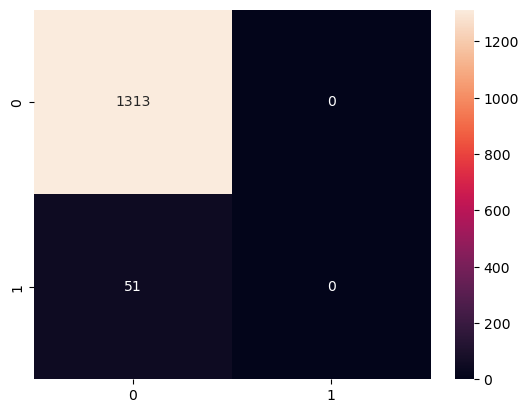

In [87]:
sns.heatmap(cm, annot=True,fmt='.5g')
plt.show()

# Random Search

In [88]:
from sklearn.model_selection import RandomizedSearchCV

In [89]:
 param_grid = {
'C' : [0.1, 1, 10, 100],
'kernel' : ['linear', 'rbf', 'poly', 'sigmoid']
}


In [90]:
svcm = SVC()

In [91]:
random_search = RandomizedSearchCV(svcm, param_grid, cv=5)

In [92]:
random_search.fit(x_train, y_train)

RandomizedSearchCV(cv=5, estimator=SVC(),
                   param_distributions={'C': [0.1, 1, 10, 100],
                                        'kernel': ['linear', 'rbf', 'poly',
                                                   'sigmoid']})

In [93]:
best_parameters = random_search.best_params_
best_model = random_search.best_estimator_
print('Hyperparameters:',best_parameters)

Hyperparameters: {'kernel': 'rbf', 'C': 1}


In [94]:
y_pred = best_model.predict(x_test)

In [95]:
acc=accuracy_score(y_test,y_pred)
print("Accuracy:",acc)

Accuracy: 0.9626099706744868


In [96]:
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.96      1.00      0.98      1313
           1       0.00      0.00      0.00        51

    accuracy                           0.96      1364
   macro avg       0.48      0.50      0.49      1364
weighted avg       0.93      0.96      0.94      1364



Confusion Matrix:  [[1313    0]
 [  51    0]]


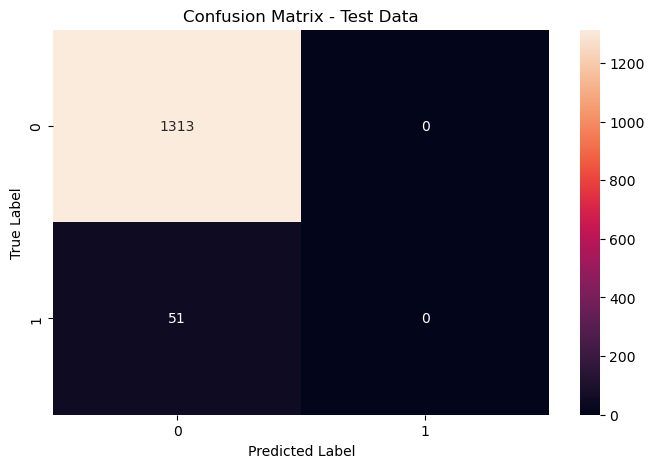

In [97]:
cm = confusion_matrix(y_test,y_pred)
print('Confusion Matrix: ',cm)
plt.figure(figsize = (8,5))
sns.heatmap(cm, annot=True, fmt='.5g')
plt.title('Confusion Matrix - Test Data')
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.show()

# Naive Bayes

In [98]:
from sklearn import model_selection, naive_bayes, metrics,feature_extraction

In [99]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.25,random_state=42)

In [100]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
x_train = scaler.fit_transform(x_train)
x_test = scaler.transform(x_test)

In [101]:
bayes = naive_bayes.MultinomialNB()

In [102]:
bayes.fit(x_train,y_train)

MultinomialNB()

In [103]:
y_pred_nb=bayes.predict(x_test)

In [104]:
accuracy=metrics.accuracy_score(y_test,y_pred_nb)
accuracy

0.9671554252199414

In [105]:
print(metrics.classification_report(y_test, y_pred_nb))

              precision    recall  f1-score   support

           0       0.97      1.00      0.98      1647
           1       0.75      0.05      0.10        58

    accuracy                           0.97      1705
   macro avg       0.86      0.53      0.54      1705
weighted avg       0.96      0.97      0.95      1705



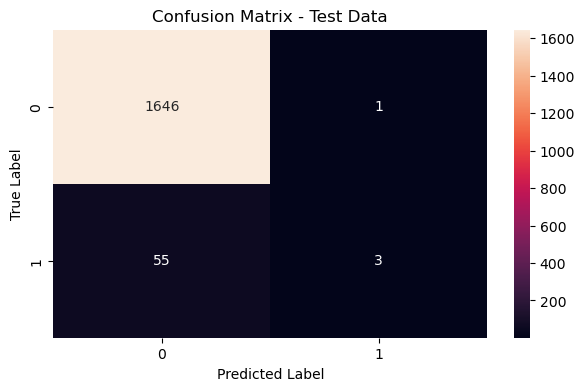

In [106]:
cm=confusion_matrix(y_test,y_pred_nb)
cm
plt.figure(figsize = (7,4))
sns.heatmap(cm, annot=True, fmt='.5g')
plt.title('Confusion Matrix - Test Data')
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.show()

In [107]:
from sklearn.metrics import roc_curve, auc

fpr = dict()
tpr = dict()
roc_auc = dict()

for i in range(nc):
    y_score = bayes.predict_proba(x_test)[:, 1]  
    fpr[i], tpr[i], _ = roc_curve(y_test, y_score, pos_label=1)
    roc_auc[i] = auc(fpr[i], tpr[i])
       

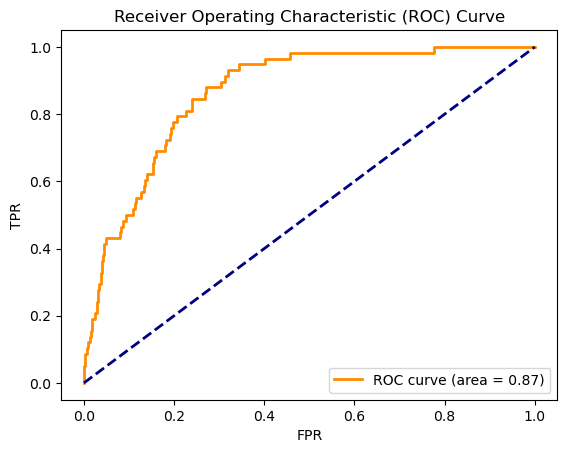

In [108]:
plt.figure()
plt.plot(fpr[0], tpr[0], color='darkorange', lw=2, label='ROC curve (area = {:.2f})'.format(roc_auc[0]))
plt.plot([0, 1], [0, 1], 'k--', color='navy', lw=2)
plt.xlabel('FPR')
plt.ylabel('TPR')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc='lower right')
plt.show()

# Tuning for Naive Bayes Model

In [109]:
 param_grid = {
'alpha': [0.1, 1, 10, 100],
'fit_prior': [True, False]
}

In [110]:
bayes = naive_bayes.MultinomialNB()
grid_search = GridSearchCV(bayes, param_grid, cv=5)
grid_search.fit(x_train, y_train)

GridSearchCV(cv=5, estimator=MultinomialNB(),
             param_grid={'alpha': [0.1, 1, 10, 100],
                         'fit_prior': [True, False]})

In [111]:
best_param = grid_search.best_params_
best_nb = naive_bayes.MultinomialNB(alpha = best_param['alpha'], fit_prior = best_param['fit_prior'])
best_nb.fit(x_train, y_train)
y_pred = best_nb.predict(x_test)

In [112]:
print("Best Hyperparameter : ", best_param)

Best Hyperparameter :  {'alpha': 100, 'fit_prior': True}


In [113]:
acc = accuracy_score(y_test, y_pred)
print('Accuracy',acc)

Accuracy 0.9665689149560117


In [114]:
print (classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.97      1.00      0.98      1647
           1       0.60      0.05      0.10        58

    accuracy                           0.97      1705
   macro avg       0.78      0.53      0.54      1705
weighted avg       0.96      0.97      0.95      1705



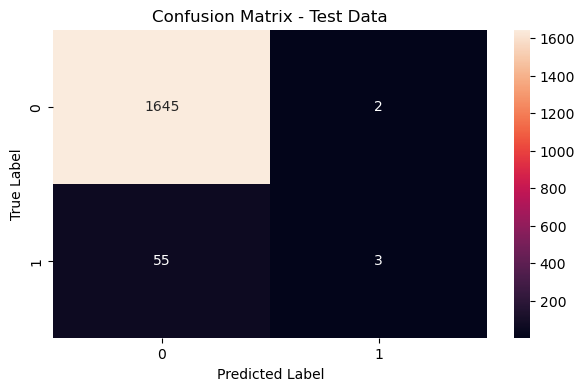

In [115]:
cm=confusion_matrix(y_test,y_pred)
cm
plt.figure(figsize = (7,4))
sns.heatmap(cm, annot=True, fmt='.5g')
plt.title('Confusion Matrix - Test Data')
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.show()

# Randomized Search

In [116]:
from scipy.stats import uniform
param_dist = {
    'alpha': uniform(0.1, 2.0),  
    'fit_prior':[True,False]
}

In [117]:
bayes = naive_bayes.MultinomialNB()

In [118]:
from sklearn.utils.validation import check_non_negative
check_non_negative(x, "MultinomialNB (input x)")

In [119]:
randomized_search = RandomizedSearchCV(bayes, param_distributions=param_dist, n_iter=10, scoring='accuracy', cv=5)
randomized_search.fit(x, y) 

RandomizedSearchCV(cv=5, estimator=MultinomialNB(),
                   param_distributions={'alpha': <scipy.stats._distn_infrastructure.rv_continuous_frozen object at 0x000002037A9BF010>,
                                        'fit_prior': [True, False]},
                   scoring='accuracy')

In [120]:
best_param = randomized_search.best_params_
print("Best Hyperparameter : ", best_param)

Best Hyperparameter :  {'alpha': 1.099238660336462, 'fit_prior': True}


In [121]:
best_nb = naive_bayes.MultinomialNB(alpha = best_param['alpha'], fit_prior = best_param['fit_prior'])
best_nb.fit(x_train, y_train)
y_pred = best_nb.predict(x_test)

In [122]:
acc = accuracy_score(y_test, y_pred)
print('Accuracy',acc)

Accuracy 0.9671554252199414


In [123]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.97      1.00      0.98      1647
           1       0.75      0.05      0.10        58

    accuracy                           0.97      1705
   macro avg       0.86      0.53      0.54      1705
weighted avg       0.96      0.97      0.95      1705



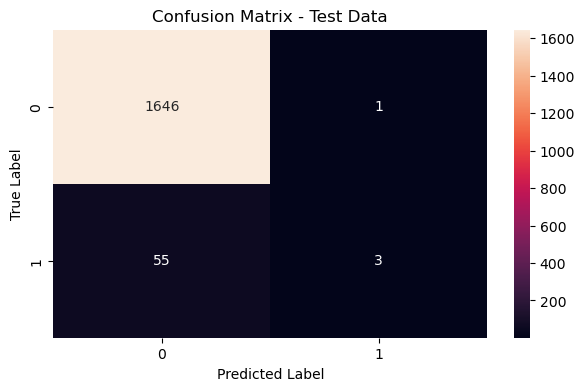

In [124]:
cm=confusion_matrix(y_test,y_pred)
cm
plt.figure(figsize = (7,4))
sns.heatmap(cm, annot=True, fmt='.5g')
plt.title('Confusion Matrix - Test Data')
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.show()

# KNN

In [54]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=42)

In [55]:
from sklearn.neighbors import KNeighborsClassifier
knn= KNeighborsClassifier(n_neighbors=10)

In [56]:
knn.fit(x_train,y_train)

KNeighborsClassifier(n_neighbors=10)

In [57]:
knn.score(x_test,y_test)

AttributeError: 'NoneType' object has no attribute 'split'

# Linear Regression

In [64]:

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error,mean_squared_error,r2_score
from sklearn.preprocessing import OneHotEncoder,StandardScaler 
from sklearn.compose import ColumnTransformer
import joblib


In [90]:
data

,Bankrupt,ROA(C) before interest and depreciation before interest,ROA(A) before interest and % after tax,ROA(B) before interest and depreciation after tax,Operating Gross Margin,Realized Sales Gross Margin,Operating Profit Rate,Pre-tax net Interest Rate,After-tax net Interest Rate,Non-industry income and expenditure/revenue,...,Net Income to Total Assets,Total assets to GNP price,No-credit Interval,Gross Profit to Sales,Net Income to Stockholder's Equity,Liability to Equity,Degree of Financial Leverage (DFL),Interest Coverage Ratio (Interest expense to EBIT),Net Income Flag,Equity to Liability
0,1,0.370594,0.424389,0.405750,0.601457,0.601457,0.998969,0.796887,0.808809,0.302646,...,0.716845,0.009219,0.622879,0.601453,0.827890,0.290202,0.026601,0.564050,1,0.016469
1,1,0.464291,0.538214,0.516730,0.610235,0.610235,0.998946,0.797380,0.809301,0.303556,...,0.795297,0.008323,0.623652,0.610237,0.839969,0.283846,0.264577,0.570175,1,0.020794
2,1,0.426071,0.499019,0.472295,0.601450,0.601364,0.998857,0.796403,0.808388,0.302035,...,0.774670,0.040003,0.623841,0.601449,0.836774,0.290189,0.026555,0.563706,1,0.016474
3,1,0.399844,0.451265,0.457733,0.583541,0.583541,0.998700,0.796967,0.808966,0.303350,...,0.739555,0.003252,0.622929,0.583538,0.834697,0.281721,0.026697,0.564663,1,0.023982
4,1,0.465022,0.538432,0.522298,0.598783,0.598783,0.998973,0.797366,0.809304,0.303475,...,0.795016,0.003878,0.623521,0.598782,0.839973,0.278514,0.024752,0.575617,1,0.035490
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6814,0,0.493687,0.539468,0.543230,0.604455,0.604462,0.998992,0.797409,0.809331,0.303510,...,0.799927,0.000466,0.623620,0.604455,0.840359,0.279606,0.027064,0.566193,1,0.029890
6815,0,0.475162,0.538269,0.524172,0.598308,0.598308,0.998992,0.797414,0.809327,0.303520,...,0.799748,0.001959,0.623931,0.598306,0.840306,0.278132,0.027009,0.566018,1,0.038284
6816,0,0.472725,0.533744,0.520638,0.610444,0.610213,0.998984,0.797401,0.809317,0.303512,...,0.797778,0.002840,0.624156,0.610441,0.840138,0.275789,0.026791,0.565158,1,0.097649
6817,0,0.506264,0.559911,0.554045,0.607850,0.607850,0.999074,0.797500,0.809399,0.303498,...,0.811808,0.002837,0.623957,0.607846,0.841084,0.277547,0.026822,0.565302,1,0.044009


In [91]:
X=data.drop([' Net Income to Total Assets'],axis=1)
Y=data[' Net Income to Total Assets']

In [92]:
X_train,X_test, Y_train, Y_test = train_test_split(X,Y, test_size=0.2,random_state=42)

In [93]:
model=LinearRegression()
model.fit(X_train,Y_train)
y_pred=model.predict(X_test)
print(model.intercept_) #y-intercept of the model

1.2273167048950069


In [94]:
print(model.coef_)

[-5.95841204e-03 -1.47386916e-01  5.04942001e-01  9.22450582e-02
  2.54473615e-02  1.21621058e-01 -1.27124790e+00 -1.77989377e+00
  4.32508322e+00 -4.49676561e-01 -1.65336523e+00 -2.55351296e-13
 -3.61932706e-14 -1.42520543e-01  1.14178111e-12  4.68746400e-03
  1.38506886e-01 -2.15087910e-01  9.90102490e-03  6.97970320e-02
  9.02327680e-03  5.00378038e-11 -2.38582401e-01 -1.36820375e-02
  1.97280813e-02 -6.72088561e-03  2.65307985e-02 -9.38299930e-03
  4.64093554e-03  3.79252185e-13  1.06645869e-10 -8.58471675e-03
 -1.22086402e-01  1.09323054e-11  1.27176047e-13 -4.62723082e-03
  3.68402531e-12 -4.86887704e-02  4.86887704e-02 -1.25888943e-02
 -8.14610923e-02 -4.02218092e-01  2.25744023e-01 -4.40527711e-02
 -2.32106877e-01  2.15574708e-02  8.56675841e-13  1.56089031e-12
 -1.42108547e-14  2.06501483e-14 -3.88388459e-02  7.69267983e-12
 -4.65615298e-03  7.16149362e-13 -2.83380561e-02  3.23201163e-04
  1.19387739e-02  2.11165987e-03  2.93473579e-13  2.08166817e-16
  3.54349371e-02  2.11558

In [95]:
mae = mean_absolute_error(Y_test,y_pred)
mse= mean_squared_error(Y_test, y_pred)
rmse = np.sqrt(mse)
r2 = r2_score(Y_test, y_pred)
print('Mean Absolute Error',mae)
print('Mean Squared Error',mse)
print('Root Mean Absolute Error',rmse)
print('R2 Score',r2)

Mean Absolute Error 949.330580076954
Mean Squared Error 1229262910.4276087
Root Mean Absolute Error 35060.8458316055
R2 Score -767518518399.402


In [96]:
#adjusted_r2=1-[(1-r2)*(n-1)/(n-k-1)]
adjusted_r2=1-((1-0.52948)*(10169-1)/(10169-13-1))
print('adjusted r2 is :',adjusted_r2)

adjusted r2 is : 0.5288776602658789


In [97]:
y_mean=np.mean(Y_test)
SSR = np.sum((y_pred - y_mean) ** 2)
SSR

1676714644764.2239

In [98]:
SST = np.sum((Y_test - y_mean) ** 2)
SST

2.184591732480575

In [99]:
SSE=SST-SSR
SSE

-1676714644762.0393

In [100]:
b=pd.DataFrame({"Actual":Y_test,"Predicted":y_pred})
b

,Actual,Predicted
239,0.765336,0.770517
2850,0.817797,0.816562
2687,0.847518,0.844501
6500,0.767650,0.759638
2684,0.810394,0.814581
...,...,...
1357,0.811952,0.815805
3946,0.812144,0.810328
5491,0.796622,0.791755
2112,0.787758,0.788186


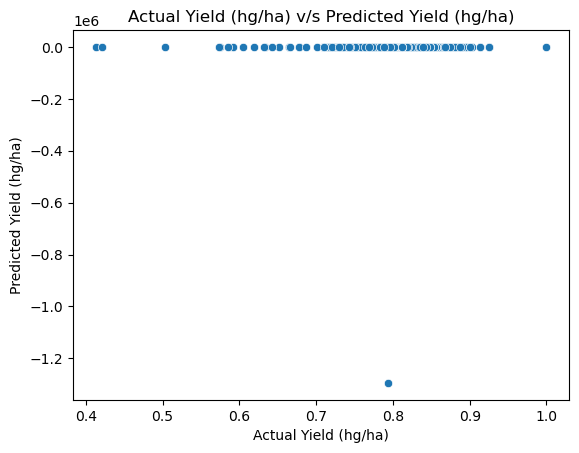

In [101]:
sns.scatterplot(x=Y_test,y=y_pred)
plt.xlabel('Actual Yield (hg/ha)')
plt.ylabel('Predicted Yield (hg/ha)')
plt.title('Actual Yield (hg/ha) v/s Predicted Yield (hg/ha)')
plt.show()